# Trabajo Práctico - Aprendizaje Automático I


Alumnos:

- Ferrari, Enzo.

- Rodriguez, Abril.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import metrics
import statsmodels.formula.api as smf

## Carga del dataset
El archivo *weather-AUS.csv* consiste en un dataset de registros metereológicos de Australia.

El objetivo del trabajo es la predicción de las variables **RainTomorrow** y **RainFallTomorrow**. Además, se analizará solo sobre las ciudades Sydney, SydneyAirport, Canberra, Melbourne y MelbourneAirport.
### Variables


In [ ]:
data = pd.read_csv("weatherAUS.csv")

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Aprendizaje Automatico I/TP/weatherAUS.csv')

### Dropear ciudades que no interesan

Como sólo trabajaremos con 5 ciudades de todo el dataset, las filtraremos.

In [ ]:
data = data[data['Location'].isin(['Sydney','SydneyAirport','Canberra','Melbourne','MelbourneAirport'])]
data

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30167,30176,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,NaN,NaN,...,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes,6.0
30168,30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,...,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes,6.6
30169,30178,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,NaN,NaN,...,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes,18.8
30170,30179,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,NaN,NaN,...,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes,77.4
30171,30180,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,NaN,NaN,...,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70366,70387,2017-06-20,Melbourne,6.4,15.8,0.0,2.4,8.8,N,39.0,...,56.0,1028.1,1024.5,1.0,7.0,7.9,15.6,No,No,0.6
70367,70388,2017-06-21,Melbourne,7.8,13.5,0.6,0.6,0.0,NNW,24.0,...,80.0,1028.8,1028.4,7.0,7.0,11.2,12.7,No,No,0.2
70368,70389,2017-06-22,Melbourne,6.7,14.1,0.2,0.6,0.0,N,24.0,...,56.0,1028.2,1024.8,7.0,7.0,7.5,13.5,No,No,0.0
70369,70390,2017-06-23,Melbourne,7.4,14.9,0.0,1.6,6.0,NNW,44.0,...,63.0,1018.8,1013.8,1.0,7.0,9.1,12.5,No,Yes,1.4


## Exploración del dataset

Con el método 'info' veremos las columnas, la cantidad de registros no-nulos y el tipo de dato que contiene cada una.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15986 entries, 30167 to 70370
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15986 non-null  int64  
 1   Date              15986 non-null  object 
 2   Location          15986 non-null  object 
 3   MinTemp           15495 non-null  float64
 4   MaxTemp           15500 non-null  float64
 5   Rainfall          15199 non-null  float64
 6   Evaporation       14280 non-null  float64
 7   Sunshine          14038 non-null  float64
 8   WindGustDir       14529 non-null  object 
 9   WindGustSpeed     14531 non-null  float64
 10  WindDir9am        15291 non-null  object 
 11  WindDir3pm        15696 non-null  object 
 12  WindSpeed9am      15725 non-null  float64
 13  WindSpeed3pm      15737 non-null  float64
 14  Humidity9am       15416 non-null  float64
 15  Humidity3pm       15461 non-null  float64
 16  Pressure9am       15251 non-null  fl

El dataset ya filtrado cuenta con 25 columnas y 15986 registros. Sin embargo, se observa que la gran mayoría de las columnas posee valores nulos.

Por otro lado, gran parte de ellas contienen datos tipo float, mientras que algunas pocas son de tipo object.

In [ ]:
print("El dataset contiene ", len(data.columns), " columnas en total.")

El dataset contiene  25  columnas en total.


In [ ]:
# Separar variables numéricas y categóricas
numerical = []
categorical = []
for columna in data.columns:
  if data[columna].dtype in ['float64','int64']:
    numerical.append(columna)
  if data[columna].dtype == 'object':
    categorical.append(columna)

numerical.remove('Unnamed: 0')
categorical.remove('Date') # No nos interesa explorar la fecha
print(numerical)
print(categorical)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainfallTomorrow']
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Con el método 'describe', obtendremos un resumen estadístico de cada variable. Esto nos será de interés para ver, en rasgos generales, cómo se distribuye cada una de ellas, así como también los valores mínimos y máximos con el fin de evidenciar valores atípicos a simple vista.

In [ ]:
data_describe = data.describe()
data_describe

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,15986.000000,15495.000000,15500.000000,15199.000000,14280.000000,14038.000000,14531.000000,15725.000000,15737.000000,15416.000000,15461.000000,15251.000000,15260.000000,13309.000000,13054.000000,15481.000000,15490.000000,15199.000000
mean,49512.619855,11.605221,21.751781,2.303744,4.866828,6.854694,44.417315,16.613672,21.797166,68.903023,51.280577,1018.305836,1016.064239,4.750545,4.746131,15.545953,20.229154,2.302586
std,15172.399796,5.851347,6.053679,7.385992,3.069869,3.842419,14.958027,10.336386,9.518033,15.614788,17.721335,7.400730,7.265386,2.728329,2.589879,5.559295,5.857956,7.385251
min,30176.000000,-8.000000,4.100000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,11.000000,3.000000,986.700000,985.500000,0.000000,0.000000,-1.300000,3.700000,0.000000
25%,34173.250000,7.900000,17.100000,0.000000,2.600000,3.700000,33.000000,9.000000,15.000000,59.000000,39.000000,1013.400000,1011.200000,2.000000,2.000000,11.600000,15.900000,0.000000
50%,47228.500000,11.600000,21.300000,0.000000,4.200000,7.500000,43.000000,15.000000,20.000000,70.000000,51.000000,1018.500000,1016.300000,6.000000,6.000000,15.400000,19.800000,0.000000
75%,66393.750000,15.800000,25.800000,0.800000,6.600000,10.000000,54.000000,22.000000,28.000000,80.000000,62.000000,1023.300000,1021.000000,7.000000,7.000000,19.500000,24.100000,0.800000
max,70391.000000,30.500000,46.800000,119.400000,23.800000,13.900000,122.000000,69.000000,76.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,37.200000,46.100000,119.400000


En la gran mayoría de las variables la media es aproximadamente igual que la mediana, esto quiere decir que sus distribuciones tienden a ser simétricas.

Se puede concluir que los valores que están presentes en el dataset son certeros, no parece haber valores atípicos en una vista global.

Sin embargo, se cuentan con una gran cantidad de datos faltates, en todas las columnas. Debemos decidir qué hacer con estos datos.

# Datos faltantes
Antes que nada, observemos que para las 4 variables a explicar hay la misma cantidad de valores faltantes (787). Como no tiene sentido rellenar valores para esas 4 variables, vamos a dropearlas. Además, sus faltantes representa menos del 10% del total de los datos.

In [ ]:
data.isnull().sum()

Unnamed: 0             0
Date                   0
Location               0
MinTemp              491
MaxTemp              486
Rainfall             787
Evaporation         1706
Sunshine            1948
WindGustDir         1457
WindGustSpeed       1455
WindDir9am           695
WindDir3pm           290
WindSpeed9am         261
WindSpeed3pm         249
Humidity9am          570
Humidity3pm          525
Pressure9am          735
Pressure3pm          726
Cloud9am            2677
Cloud3pm            2932
Temp9am              505
Temp3pm              496
RainToday            787
RainTomorrow         787
RainfallTomorrow     787
dtype: int64

In [ ]:
data.dropna(subset=['Rainfall', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'], inplace=True)


In [ ]:
print(f'Cantidad de registros: {data.shape[0]}')
print(f'Registros con todos los datos presentes: {data.notnull().all(axis=1).sum()}')

print('Cantidad de registros faltantes para cada variable')
data.isna().sum()

Cantidad de registros: 15036
Registros con todos los datos presentes: 10461
Cantidad de registros faltantes para cada variable


Unnamed: 0             0
Date                   0
Location               0
MinTemp                8
MaxTemp                5
Rainfall               0
Evaporation         1681
Sunshine            1931
WindGustDir         1436
WindGustSpeed       1434
WindDir9am           672
WindDir3pm           288
WindSpeed9am         260
WindSpeed3pm         249
Humidity9am           86
Humidity3pm           43
Pressure9am          252
Pressure3pm          244
Cloud9am            1900
Cloud3pm            2136
Temp9am               22
Temp3pm               14
RainToday              0
RainTomorrow           0
RainfallTomorrow       0
dtype: int64

Notamos que ninguna columna pasa de un 20% de valores faltantes. Es factible entonces llenar los valores faltantes en todas las columnas.

A continuación, vemos graficados los datos faltantes según localidad

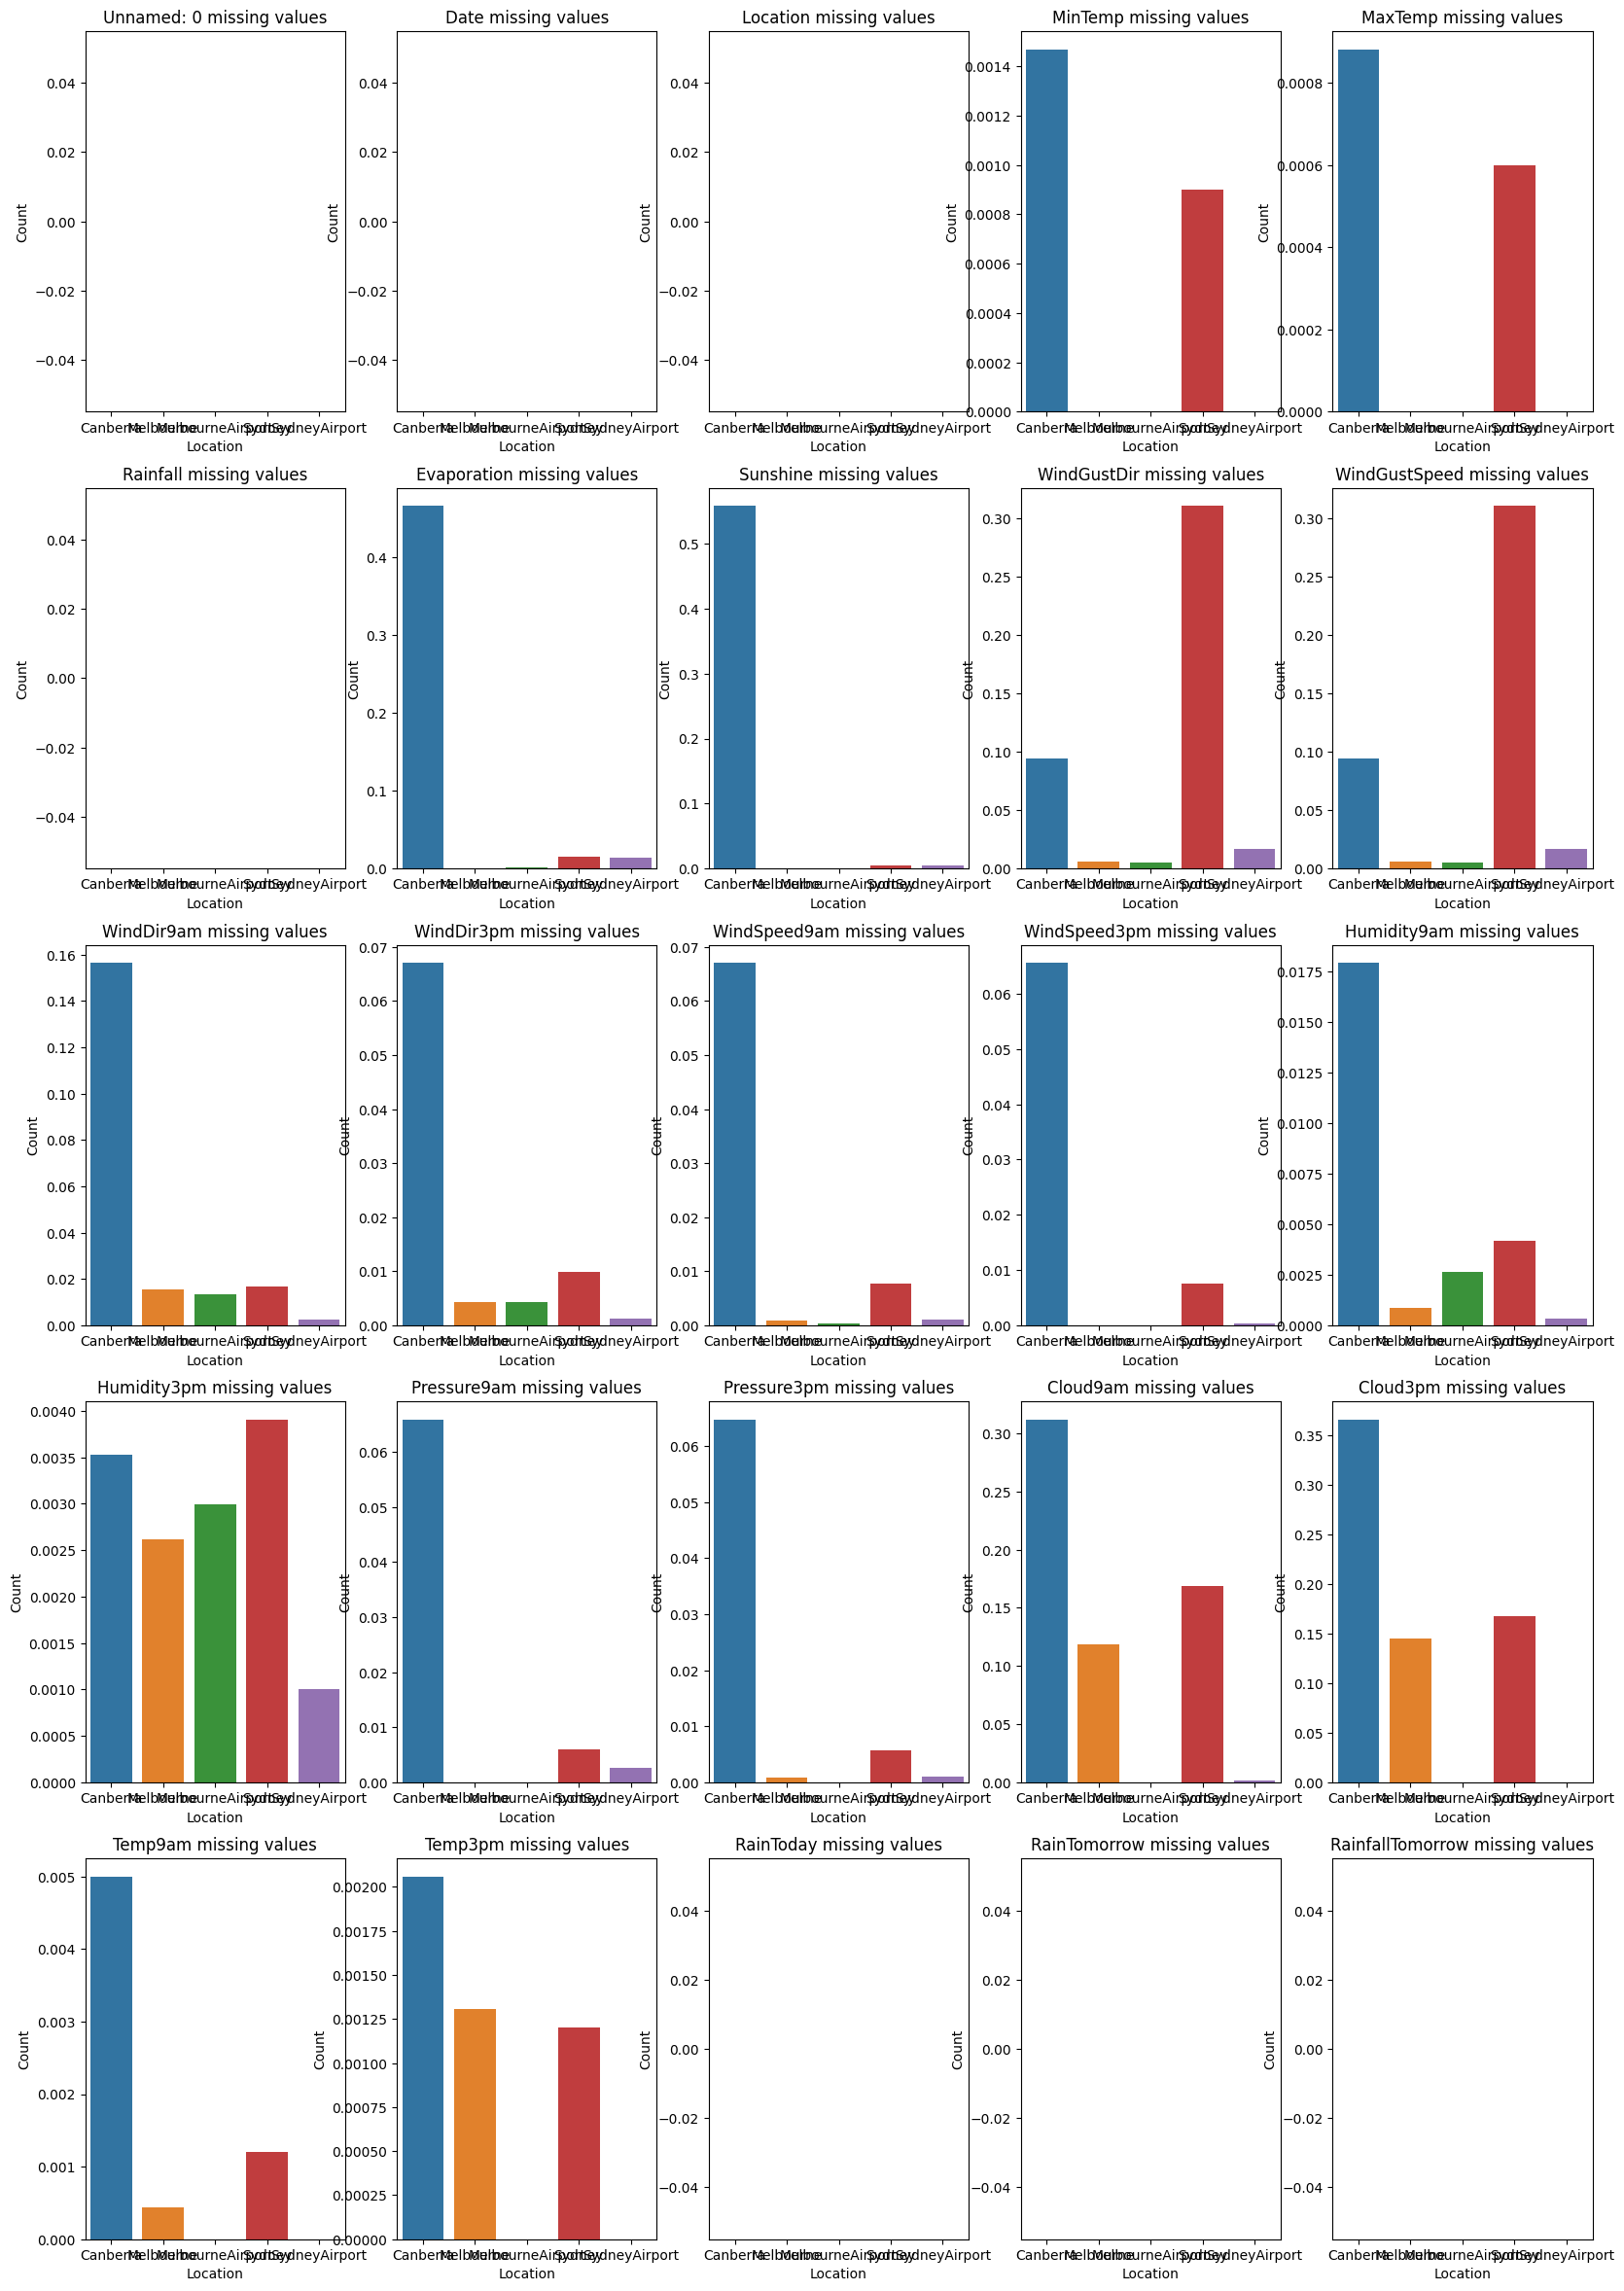

In [ ]:
plt.figure(figsize=(20,60))
x_size = 10
y_size = 5
plt.subplot(x_size,y_size,1)
for n_col, column in enumerate(data.columns):
  plt.subplot(x_size, y_size, n_col + 1)
  data_missing = data.groupby('Location')[column].apply(lambda x: x.isna().sum() / x.size)
  sns.barplot(x=data_missing.index, y=data_missing.values)
  plt.ylabel('Count')
  plt.title(f'{column} missing values')
plt.show()

## Valores faltantes para variables numéricas
Para llenar los valores faltantes de cada variable, consideramos como una opción completar con la media de cada localidad ya que la mayoría de las distribuciones son simétricas.

Sin embargo, notamos que los valores faltantes de cada columna se encuentran distribuidos la mayoría sobre una ciudad. Esto dificulta nuestro método de rellenar valores faltantes ya que una ciudad puede tener una gran cantidad de ellos.

Analizando los valores faltantes de cada columna, vemos que aquellos que tienen una ciudad con una gran proporción de valores faltantes son Evaporation, Sunshine, Cloud9am y Cloud3pm. Podemos considerar tomar las medias globales, pero para esto deberiamos ver que la varianza no sea muy alta.

Podemos ver en el segundo gráfico que no hay una varianza alta, por lo que podemos completar con la media global para estas variables

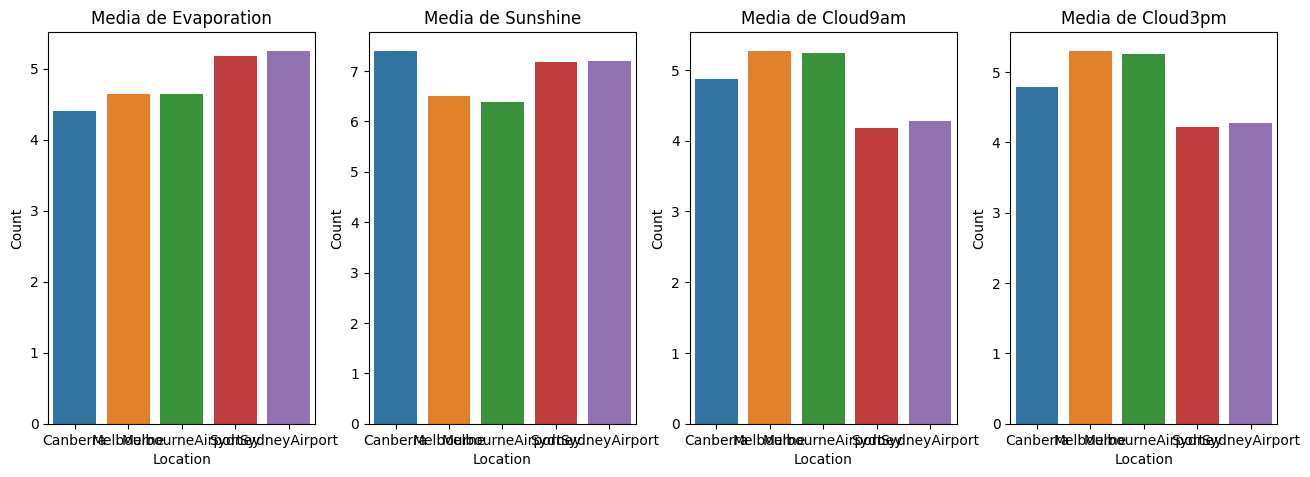

In [ ]:
problematic_numerical = ['Evaporation','Sunshine', 'Cloud9am', 'Cloud3pm']

# Ver promedios según localidad
plt.figure(figsize=(20,60))
x_size = 10
y_size = 5
plt.subplot(x_size,y_size,1)
for n_col, column in enumerate(problematic_numerical):
  plt.subplot(x_size, y_size, n_col + 1)
  data_missing = data.groupby('Location')[column].mean()
  sns.barplot(x=data_missing.index, y=data_missing.values)
  plt.ylabel('Count')
  plt.title(f'Media de {column}')
plt.show()

In [ ]:
# Completamos missing values
non_problematic_numerical = list(set(numerical) - set(problematic_numerical))
for column in non_problematic_numerical:
  data[column] = data.groupby('Location')[column].transform(lambda x: x.fillna(x.mean()))

for column in problematic_numerical:
  data[column] = data[column].fillna(data[column].mean())


## Valores faltantes para variables categóricas
De manera similar a lo que hicimos para variables numéricas, decidimos completar las variables categóricas con la moda de su respectiva localidad

In [ ]:
# Reemplazar missing values de categóricas

categorical_explicative = list(set(categorical) - set(['Location', 'RainToday', 'RainTomorrow']))

for column in categorical_explicative:
    data[column] = data.groupby('Location')[column].apply(lambda x: x.fillna(x.mode().iloc[0])) # iloc dado que pueden dar varias modas

<ipython-input-17-6d42bc8a908e>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data[column] = data.groupby('Location')[column].apply(lambda x: x.fillna(x.mode().iloc[0])) # iloc dado que pueden dar varias modas
<ipython-input-17-6d42bc8a908e>:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  da

# Tratamiento de datos
Las variables que tenemos presentes tienen distinta naturaleza: algunas son numéricas, otras categóricas, algunas tienen una mayor importancia que las otras y algunas tienen una mayor cantidad de valores faltantes que otras.

## Análisis
Para conocer la naturaleza de cada variable, debemos realizar un análisis exhaustivo sobre cada una de ellas.

A continuación, un histograma para cada variable númerica, y luego un boxplot.

Text(0.5, 1.0, 'Histogramas variables numéricas')

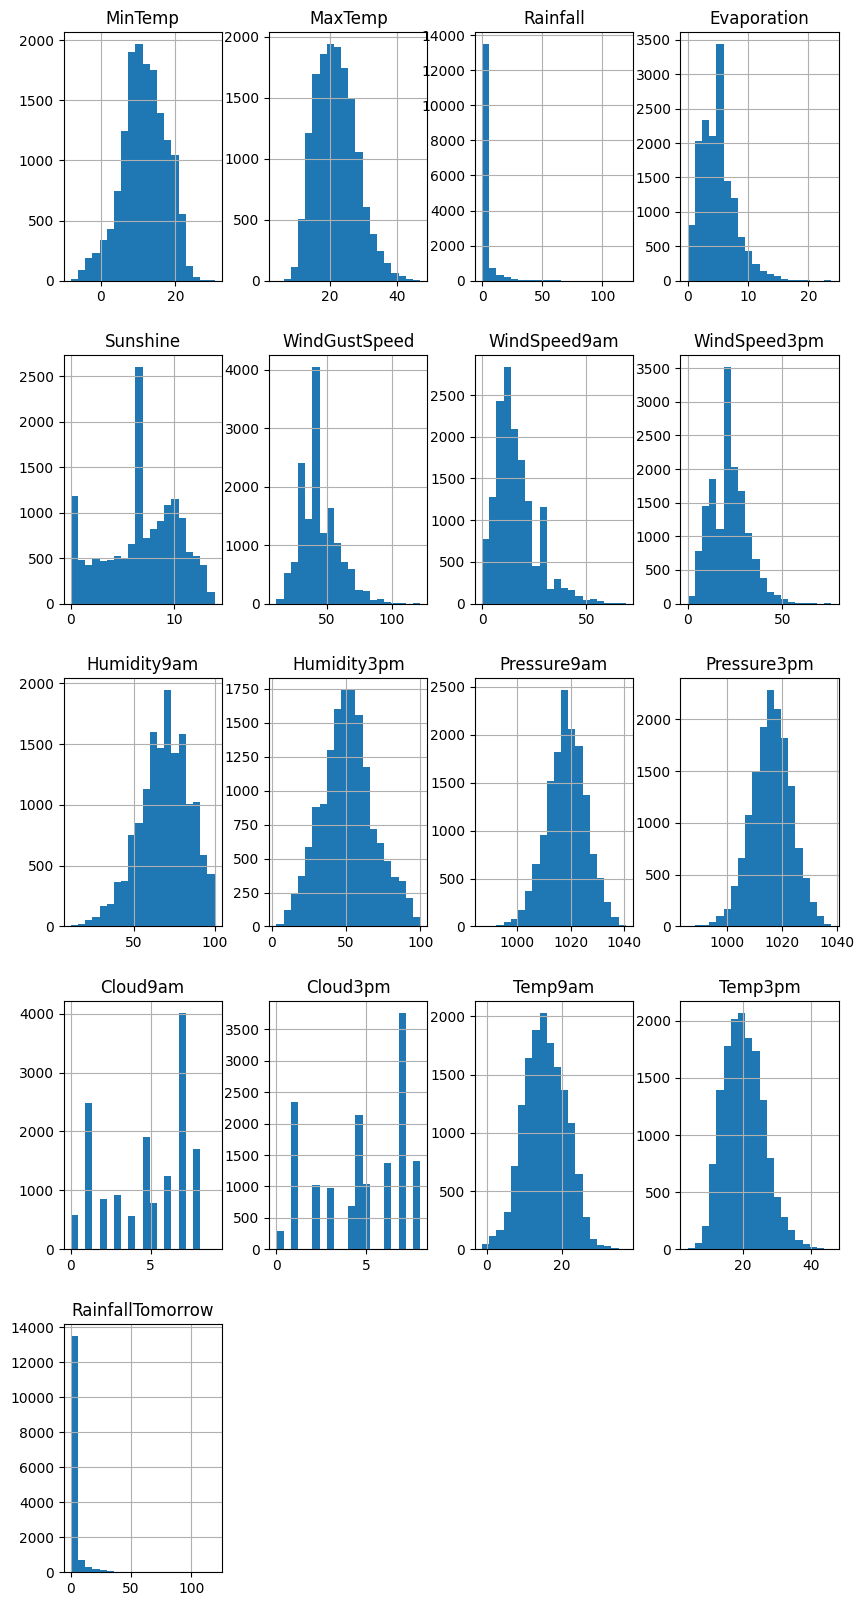

In [ ]:
data[numerical].hist(bins=20, figsize=(10,20))
plt.title('Histogramas variables numéricas')

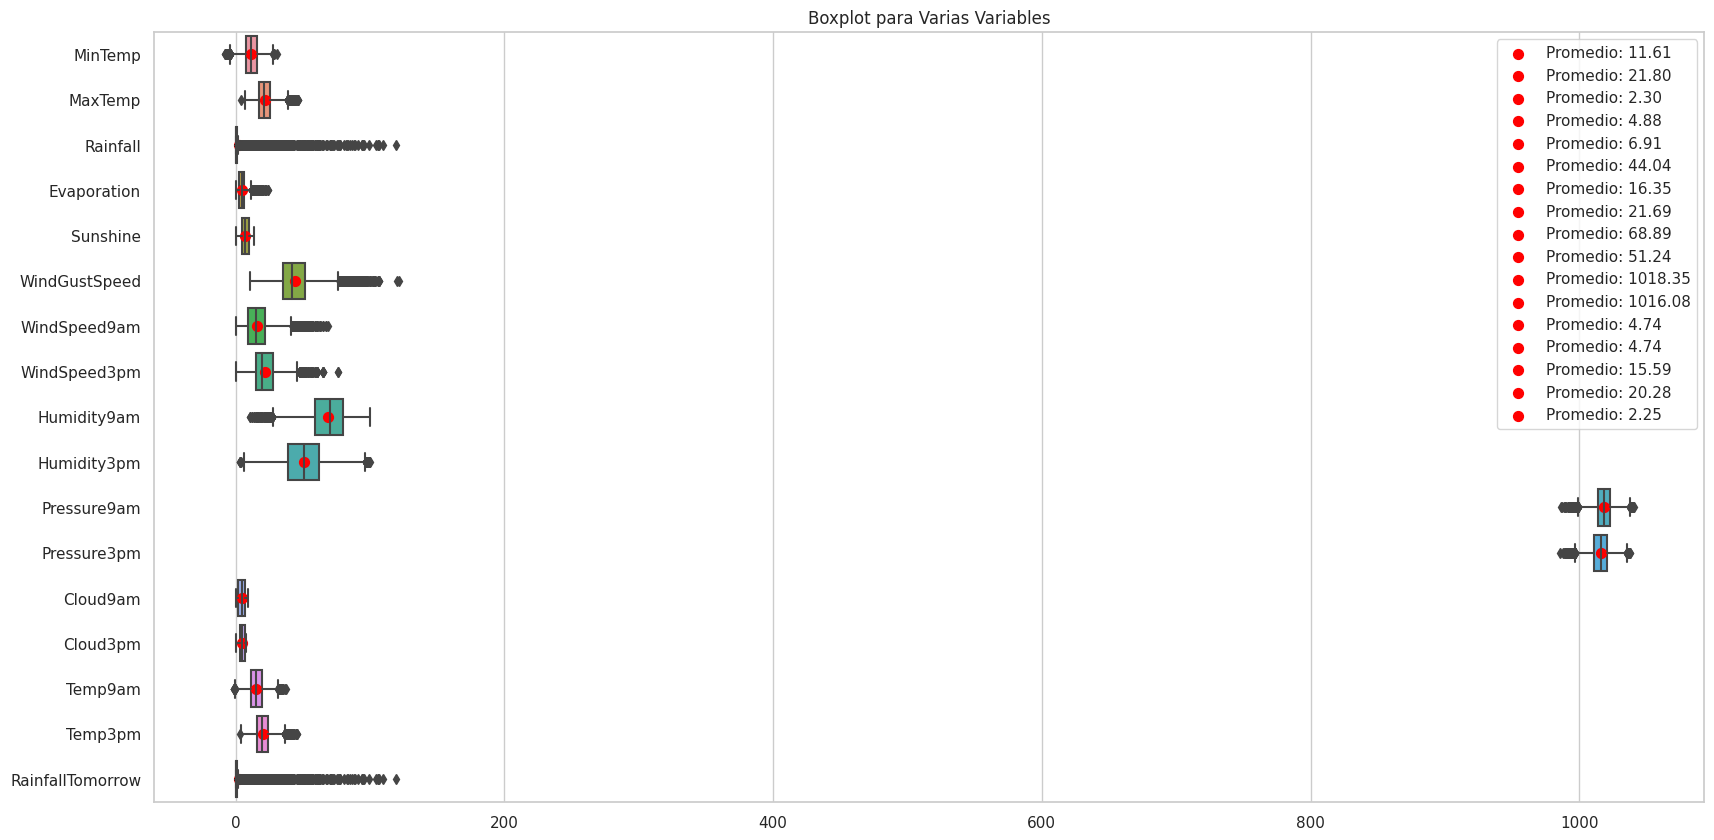

In [ ]:
df_numericas = data[numerical]

means = df_numericas.mean()

sns.set(style="whitegrid")
plt.figure(figsize=(20, 10))  # Tamaño del gráfico
ax = sns.boxplot(data=df_numericas, orient="h")

for i, mean in enumerate(means):
    ax.scatter(mean, i, color='red', marker='o', s=50, label=f'Promedio: {mean:.2f}')
plt.yticks(range(len(df_numericas.columns)), df_numericas.columns)
plt.title("Boxplot para Varias Variables")
plt.legend(loc='upper right')

plt.show() # Muestra el gráfico

Efectivamente, se observa que la mayoría de las variables poseen distribuciones simétricas, es decir, que tienden a ser normales. Sin embargo, hay dos variables en donde esto no se cumple: Rainfall y RainfallTomorrow. Sus distribuciones son asimétricas hacia la derecha ya que la mayoría de los días no llueve. A causa de esto, gran parte de los días donde ha llovido se tomaron como atípicos (como se vio en los boxplot)

Luego, graficaremos las variables categóricas para visualizar cómo se comportan.

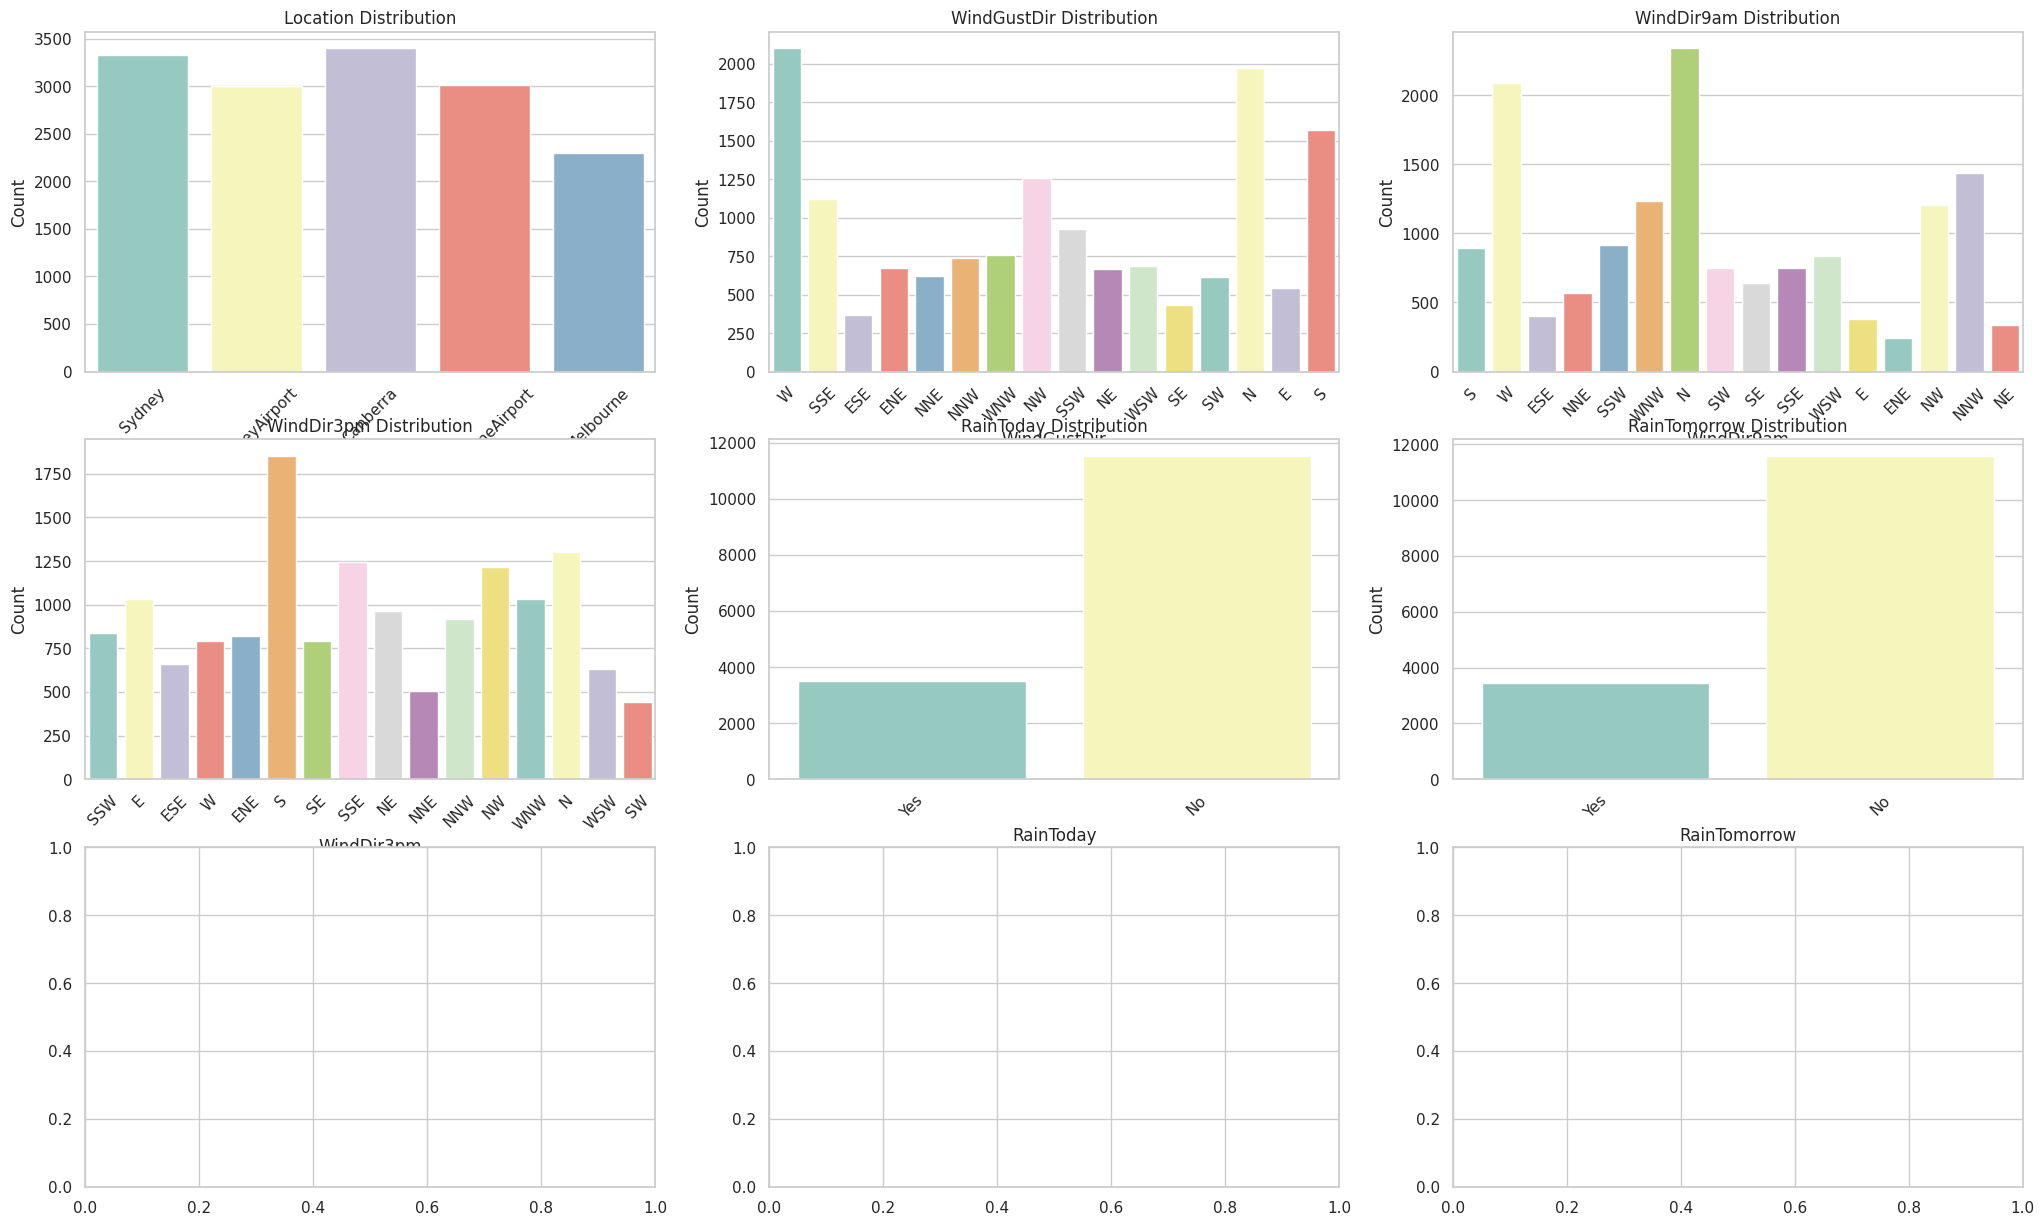

In [ ]:
# Gráficos de frecuencias de variables categóricas

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(25, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through categorical variables and create countplots in subplots
for i, var in enumerate(categorical):
    sns.countplot(data=data, x=var, palette="Set3", ax=axes[i])
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



### Análisis exploratorio: Variable objetivo

Veamos como se comporta cada variable respecto con la variable objetivo

Primero, veamos como está distribuida nuestra variable objetivo

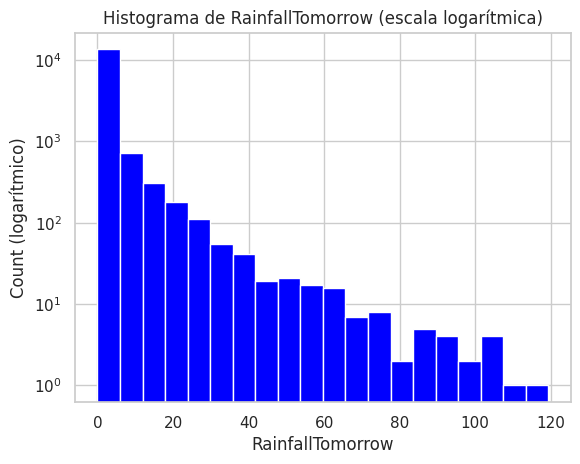

Text(0.5, 1.0, 'Bar plot de días de lluvia')

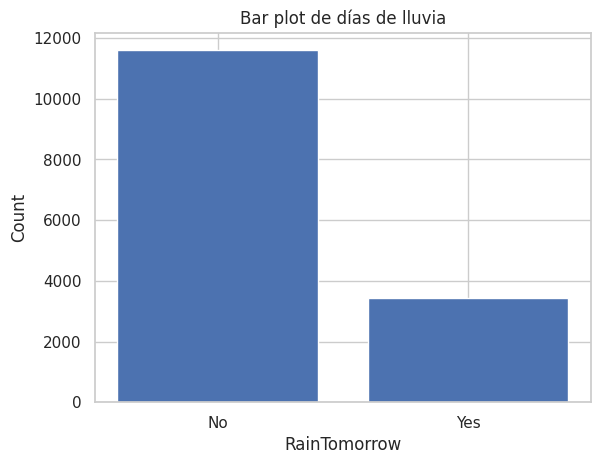

In [ ]:
# Transformación logarítmica
# Calculamos los datos del histograma
counts, bins, _ = plt.hist(data['RainfallTomorrow'], bins=20, alpha=1, color='blue')
plt.yscale('log')
plt.xlabel('RainfallTomorrow')
plt.ylabel('Count (logarítmico)')
plt.title('Histograma de RainfallTomorrow (escala logarítmica)')
plt.show()

# RainTomorrow
RainTomorrow_counts = data['RainTomorrow'].value_counts()
RainTomorrow_counts
plt.bar(RainTomorrow_counts.index, RainTomorrow_counts.values)
plt.xlabel('RainTomorrow')
plt.ylabel('Count')
plt.title('Bar plot de días de lluvia')

Se puede observar que hay una mayor cantidad de datos donde no llueve comparado con los días que llueve. Esto puede hacer que el modelo sea mejor para predecir dias en los que no llueva.

Por esta razón, los datos no se encuentran balanceados y este hecho se debe tener en cuenta en caso de realizar clasificación o dependiendo los objetivos del problema.

## Análisis exploratorio: Scatter plot
Veamos ahora como se relaciona cada variable respecto a nuestra variable objetivo. Para esto, usamos scatter plots.

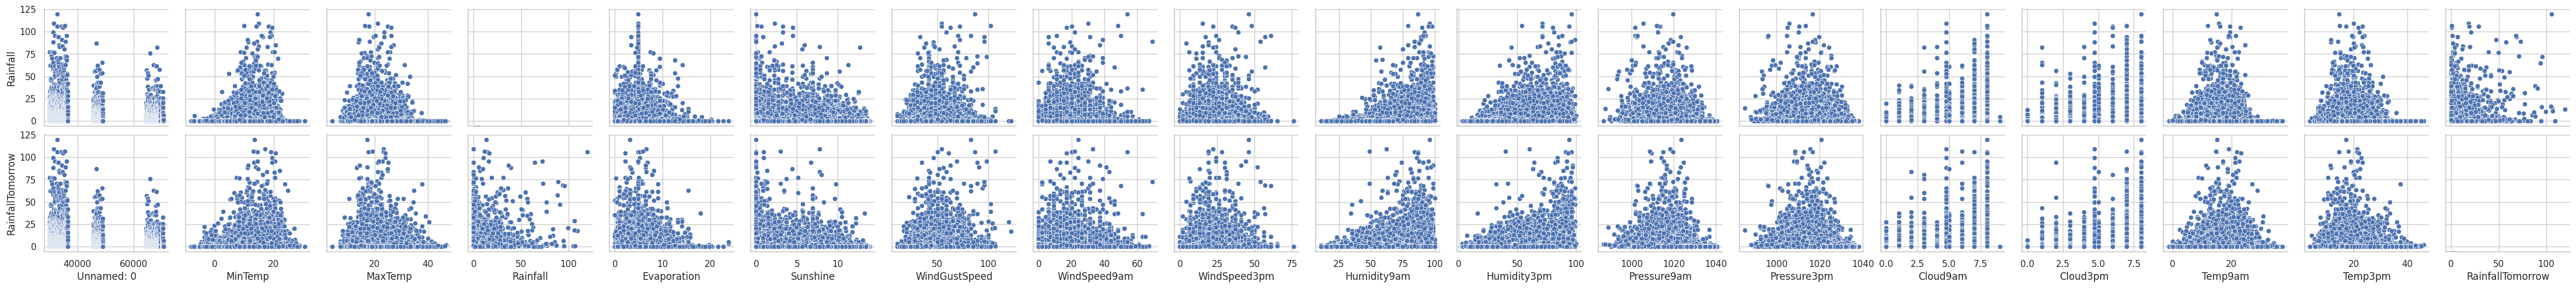

In [ ]:
# pairplot crea scatterplots de todas las variables del dataset
sns.pairplot(data, y_vars=['Rainfall', 'RainfallTomorrow'])


## Análisis de correlación
Veamos ahora si existe correlación entre las variables explicativas, así podemos evitar el problema de la multicolinearidad.

Haremos un mapa de calor entre variables y analizaremos sus coeficientes de correlación.

<ipython-input-23-05e6fc59747d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = data.drop(['Date', 'Location', 'Unnamed: 0'], axis=1).corr()


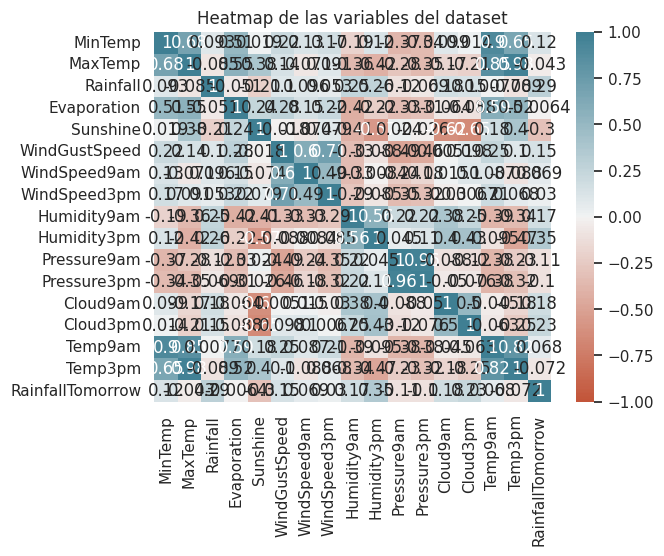

In [ ]:
# Buscar correlación entre las variables numéricas:
matrix_corr = data.drop(['Date', 'Location', 'Unnamed: 0'], axis=1).corr()
ax = sns.heatmap(
    matrix_corr,
    vmin=-1,vmax=1,center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    annot=True
)
plt.title('Heatmap de las variables del dataset')
plt.show()


Como contamos con muchas variables, se hace complicado visualizarlas correctamente. Veamos aquellos pares que tengan mayor correlación.

In [ ]:
# Creamos la matriz
matrix_corr = data.drop(['Date','Location','Unnamed: 0'], axis=1).corr(method='spearman')

upper_matrix_corr = matrix_corr.where( # Argumento: matriz de booleanos
    np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool) # Crea una matriz de booleanos, creando una matriz triangular superior
)
# Con estas matrices triangulares superiores
top_pos_corr = upper_matrix_corr.unstack().dropna().sort_values(ascending=False).head(25)
top_neg_corr = upper_matrix_corr.unstack().dropna().sort_values(ascending=True).head(20)

print(top_pos_corr)
print(top_neg_corr)

Temp3pm           MaxTemp          0.978243
Pressure3pm       Pressure9am      0.956869
Temp9am           MinTemp          0.907097
                  MaxTemp          0.866553
Temp3pm           Temp9am          0.837467
MaxTemp           MinTemp          0.713532
WindSpeed3pm      WindGustSpeed    0.698901
Temp3pm           MinTemp          0.687997
Temp9am           Evaporation      0.600447
Evaporation       MaxTemp          0.573714
Temp3pm           Evaporation      0.544057
Humidity3pm       Humidity9am      0.540501
WindSpeed9am      WindGustSpeed    0.538095
Evaporation       MinTemp          0.524494
Cloud3pm          Cloud9am         0.507037
RainfallTomorrow  Humidity3pm      0.448709
WindSpeed3pm      WindSpeed9am     0.446702
Cloud3pm          Humidity3pm      0.444750
Cloud9am          Humidity3pm      0.420676
RainfallTomorrow  Cloud3pm         0.417495
Temp3pm           Sunshine         0.414006
Cloud9am          Humidity9am      0.400371
Sunshine          MaxTemp       

<ipython-input-24-b4fc176aae75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = data.drop(['Date','Location','Unnamed: 0'], axis=1).corr(method='spearman')
<ipython-input-24-b4fc176aae75>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.triu(np.ones(matrix_corr.shape), k=1).astype(np.bool) # Crea una matriz de booleanos, creando una matriz triangular superior


## Selección de variables
La correlación entre las variables explicativas debe ser tenida en cuenta en el momento de aplicar el modelo. A pesar de que la correlación no afecta directamente al modelo, si incluímos variables que están fuertemente relacionadas, agregar ambas puede ser redundante, o incluso puede ser complicado interpretar los coeficientes dado que la multicolinearidad puede dar malos valores del z-value.

### Criterios

Decidimos tomar el siguiente criterio para tratar los pares de variables respecto a su correlación:
- entre 0.7 y 1: Alta correlación, estos pares deben ser tratados si o si.
- entre 0.3 y 0.7: Correlación moderada, se deben tomar consideraciones respecto a si tratamos o no estas variables.
- entre 0 y 0.3: Correlación baja, ignoramos estos pares.

Sin embargo, hay que esperar que haya correlación entre variables, al ser datos del clima, hay que considerar ser flexibles con este indicador.

### Variables

Por lo visto en las tablas anteriores, notamos que las siguientes variables tienen una correlación considerable:
- MinTemp, MaxTemp, Temp3pm, Temp9am: Todos los pares tomados de estas variables tienen una correlación alta, llegando lo más alto a ser 0.97. MinTemp tiene alta correlación con Temp9am y MaxTemp con Temp3pm, lo que es lógico ya que los extremos de temperatura se suelen dar en esos horarios. Se decide dropear Temp9am y Temp3pm y quedarnos con Min y Max, sin embargo creamos una nueva columna que es el promedio, luego experimentando con los modelos decidiremos con cuál quedarnos.
- Pressure9am, Pressure3pm: Alta correlación, es razonable tomar el promedio entre estas dos para reducir las variables. Otra opción puede ser quedarnos con Pressure9am e incluir una nueva variable que tome la diferencia de presión, no habrá correlación y guarda la información de las dos variables.
- WindGustSpeed, WindSpeed9am, WindSpeed3pm: WindGustSpeed tiene una fuerte correlación con WindSpeed3pm, podríamos considerar dropear WindGustSpeed, y nos quedaríamos con WindSpeed3pm y WindSpeed9am.
- Sunshine: Tiene correlación negativa considerable con múltiples variables, puede generar muchos problemas incluirla. Podríamos dropearla esperando que la información de las nubes y la humedad. Sin embargo, tiene correlación con RainFallTomorrow ¿Qué hacemos?

### ¿Cómo podemos incluir la fecha?
A pesar de que no es incluir a la fecha como variable en el modelo, podemos tratar de convertirlo en algo más manejable. Una opción es tomar la temporada y otra es tomar el mes. Optamos por tomar el mes.

### Alternativa para la dirección del viento
Hay 16 tipos distintos de dirección. Podemos usar una transformación trigonométrica para representar la dirección, y así pasar de una variable categórica con 16 categorías a dos numéricas.

De esta manera perdemos interpretabilidad (¿Cómo entendemos la evaluación del coseno y seno en el modelo?) pero compactamos las variables y contemplamos la cercanía y naturaleza de las direcciones (en una codificación one-hot todas las direcciones son perpendiculares).

¡Incluso podemos hacer lo mismo para la fecha!

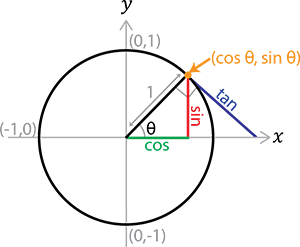

A continuación, agregaremos una nueva variable al dataset: "Month". Ésta será necesaria a la hora de hacer regresión y mucho más manejable que "Date".

In [ ]:
# Convertir la fecha a meses
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.strftime('%b')
data['Month']

30167    Feb
30168    Feb
30169    Feb
30170    Feb
30171    Feb
        ... 
70366    Jun
70367    Jun
70368    Jun
70369    Jun
70370    Jun
Name: Month, Length: 15036, dtype: object

Luego, agregaremos más columnas: otras maneras de representar las direcciones de los vientos y los meses (variables categóricas) con valores de seno y coseno. Este criterio lo tomamos con el fin de analizar qué maneras de representar estos datos son mejores/más eficientes a la hora de realizar regresión lineal.

In [ ]:
from datetime import datetime

# Definir una función que transforme dirección a componentes seno y coseno
# Primero, creemos un diccionario que represente cada dirección con su ángulo en grados
direction_to_angle = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}
# Tomamos como referencia las direcciones en la convención que aparece en Wikipedia https://en.wikipedia.org/wiki/Points_of_the_compass
def dir_to_circle(series_direccion):
  '''
  Transforma a coordenadas polares la dirección.
  Recibe como entrada el Series con las direcciones.
  Devuelve un par ordenado donde la primera componente
  representa el Series con los valores del coseno y
  la segunda los valores del seno
  '''
  # numpy toma valores en radianes, necesitamos convertirlo primero
  direccion_radian = series_direccion.map(direction_to_angle).apply(np.deg2rad)

  # Transformamos a seno y coseno
  sine_series = direccion_radian.apply(np.sin)
  cosine_series = direccion_radian.apply(np.cos)
  return cosine_series, sine_series

dir_to_circle(data['WindGustDir'])
def is_leap_year(date):
  # Chequear si es un datetime es año bisiesto
  is_leap_year = (date.year % 4 == 0) and (date.year % 100 != 0 or date.year % 400 == 0)
  return is_leap_year

def date_to_circle(series_fecha):
  '''
  Transforma a representación coseno-seno la fecha.
  Recibe como entrada el Series con los datetime.
  Devuelve un par ordenado donde la primera componente
  representa el Series de los valores del coseno y
  la segunda los del seno
  '''
  direccion_radian = series_fecha.apply(lambda x: 2 * np.pi * x.dayofyear / (366 if is_leap_year(x) else 355)) # Pasar a radianes la fecha (vuelta completa si es un año entero)

  # Transformamos a seno y coseno
  sine_series = direccion_radian.apply(np.sin)
  cosine_series = direccion_radian.apply(np.cos)
  return cosine_series, sine_series

date_to_circle(data['Date'])

(30167    0.852864
 30168    0.843776
 30169    0.834438
 30170    0.824855
 30171    0.815028
            ...   
 70366   -0.993390
 70367   -0.995266
 70368   -0.996830
 70369   -0.998082
 70370   -0.999021
 Name: Date, Length: 15036, dtype: float64,
 30167    0.522133
 30168    0.536696
 30169    0.551102
 30170    0.565345
 30171    0.579421
            ...   
 70366    0.114791
 70367    0.097191
 70368    0.079562
 70369    0.061907
 70370    0.044233
 Name: Date, Length: 15036, dtype: float64)

In [ ]:
datetime_str = '2006-02-20'
datetime_obj = pd.to_datetime(datetime_str)

dayofyear_sin = np.sin(2 * np.pi * datetime_obj.dayofyear / 365)
dayofyear_cos = np.cos(2 * np.pi * datetime_obj.dayofyear / 365)

print(f'Date: {datetime_obj}')
print(f'DayofYear_sin: {dayofyear_sin}')
print(f'DayofYear_cos: {dayofyear_cos}')


Date: 2006-02-20 00:00:00
DayofYear_sin: 0.7694148268839378
DayofYear_cos: 0.6387494220515272


## Nuevos métodos
En la materia se ha visto el método de la regularización, por lo que podemos, luego de tratar los valores faltantes, mantener los outliers para contemplar la aplicación de estos modelos y luego crear otro modelo para tratar los outliers.

In [ ]:
data_no_outliers = data.copy()

# Outliers
Observando el histograma de frecuencia anteriormente, vemos que no hay outliers que hayan sido producto de un bad input, son todos outliers naturales.

En esta sección, trataremos los outliers en el dataframe 'data_no_outliers', mientras que el dataframe anterior 'data' quedará sin tratar. De esta manera, utilizaremos estos dos dataframes para realizar regresión y visualizar qué tanto varían los resultados.

# Cambiar outliers
Decidimos tomar como método para tratar outliers al winsoring. Para esto, colapsamos los outliers sobre el rango intercuartil.

In [ ]:
# Reemplazar outliers
def reemplazar_outliers(series):
  '''Función auxiliar para usar con el método transform en el groupby.
  Toma como entrada un Series y colapsa los outliers al rango intercuartil'''

  Q1 = series.quantile(0.25)
  Q3 = series.quantile(0.75)
  IQR = Q3 - Q1

  # Definimos los límites intercuartílicos
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Usamos la librería numpy para reemplazar outliers en el series
  series[series > limite_superior] = limite_superior
  series[series < limite_inferior] = limite_inferior
  return series

<Figure size 800x800 with 0 Axes>

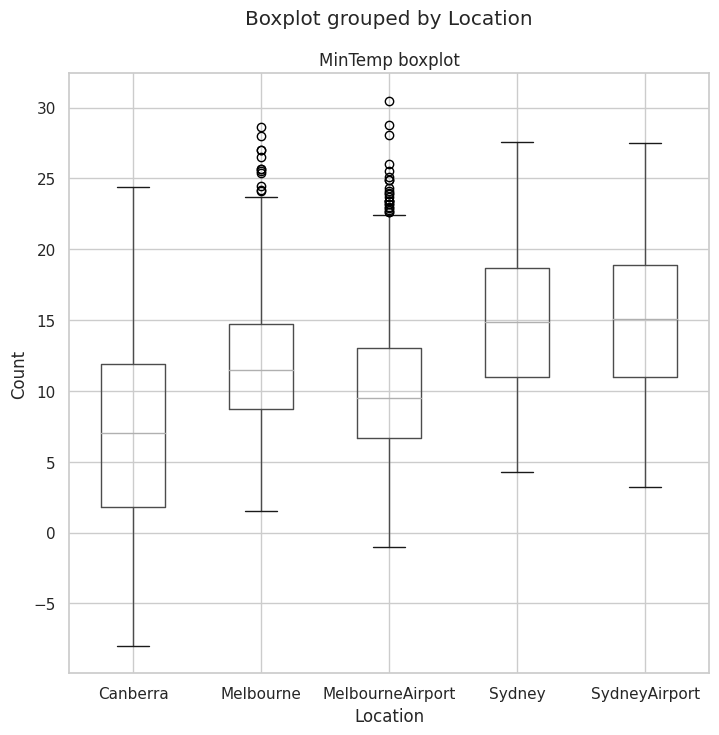

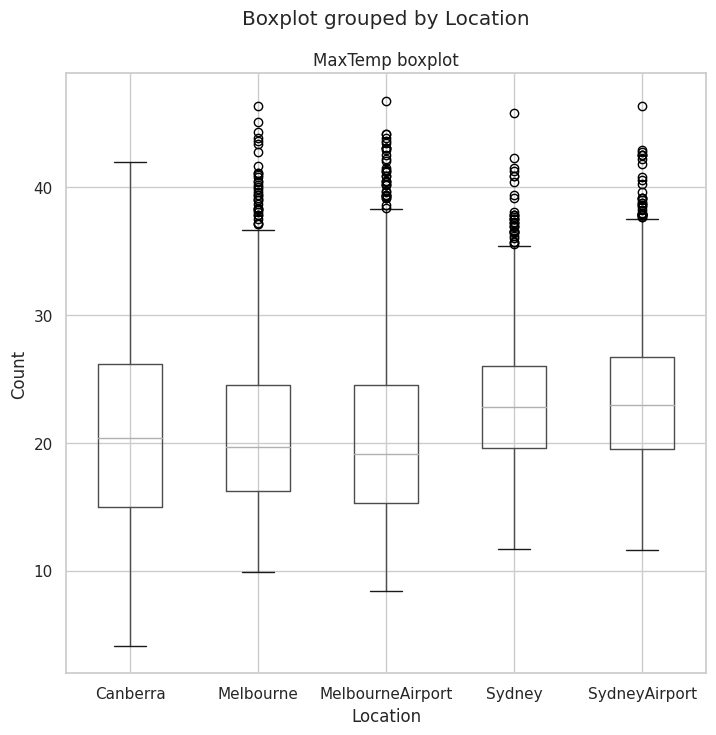

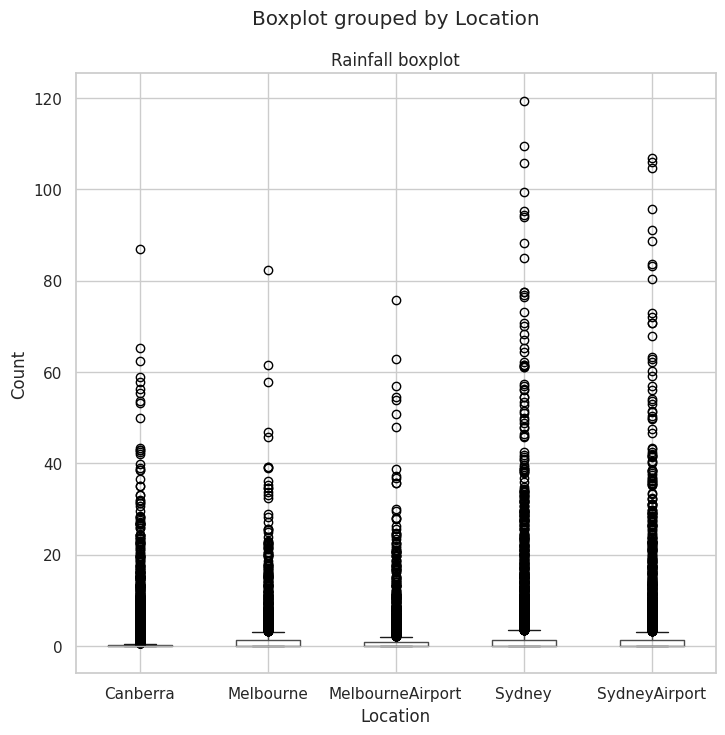

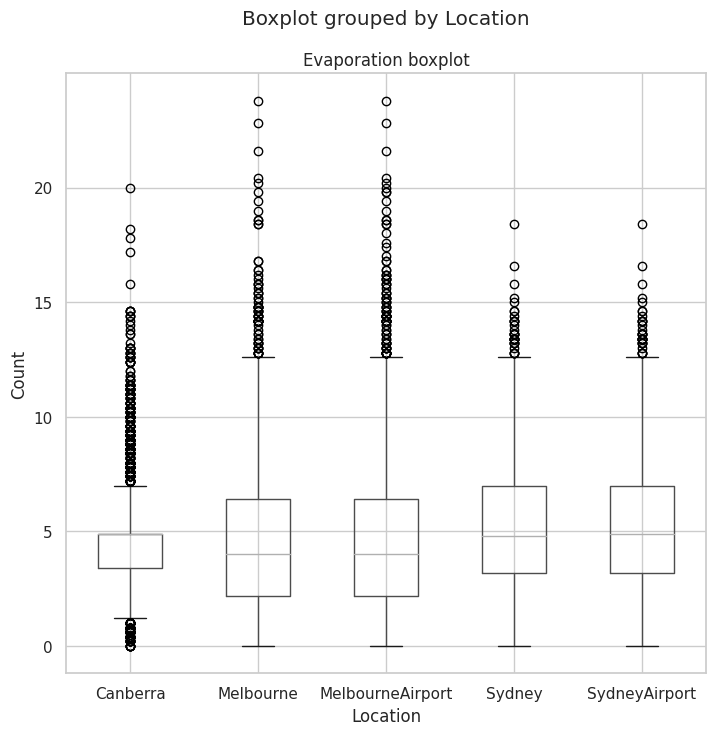

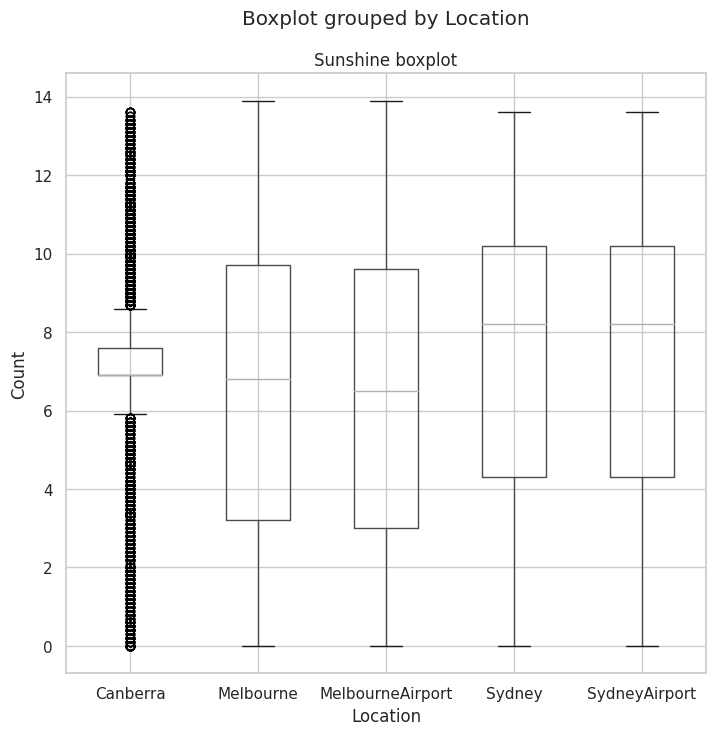

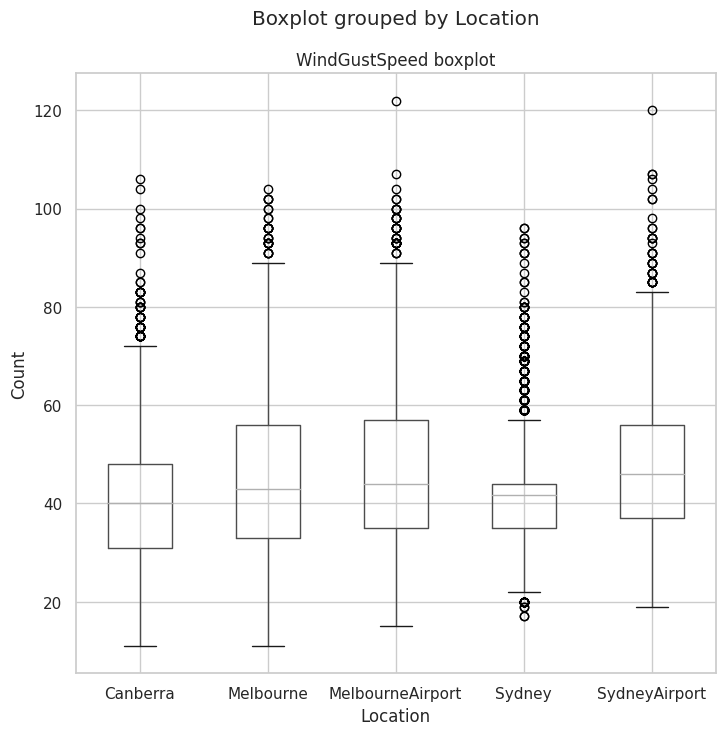

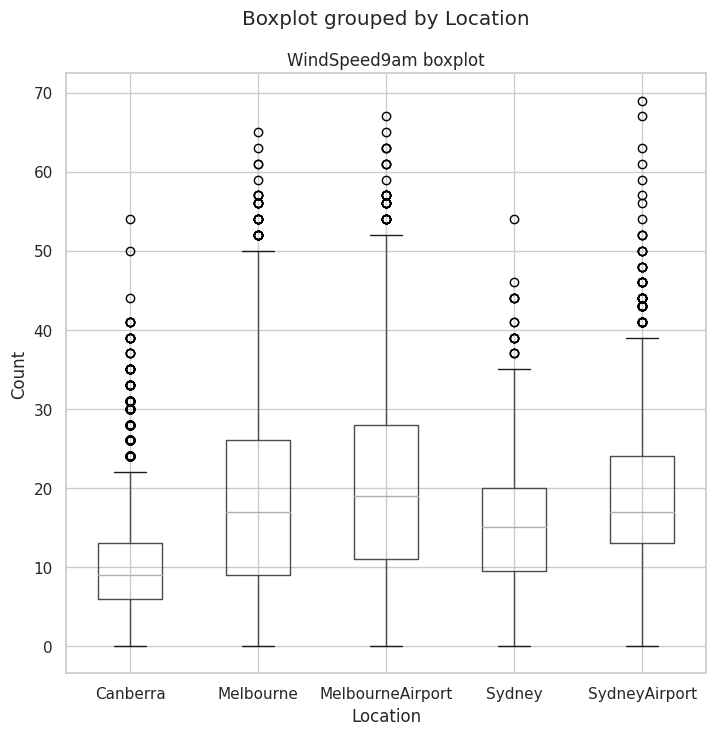

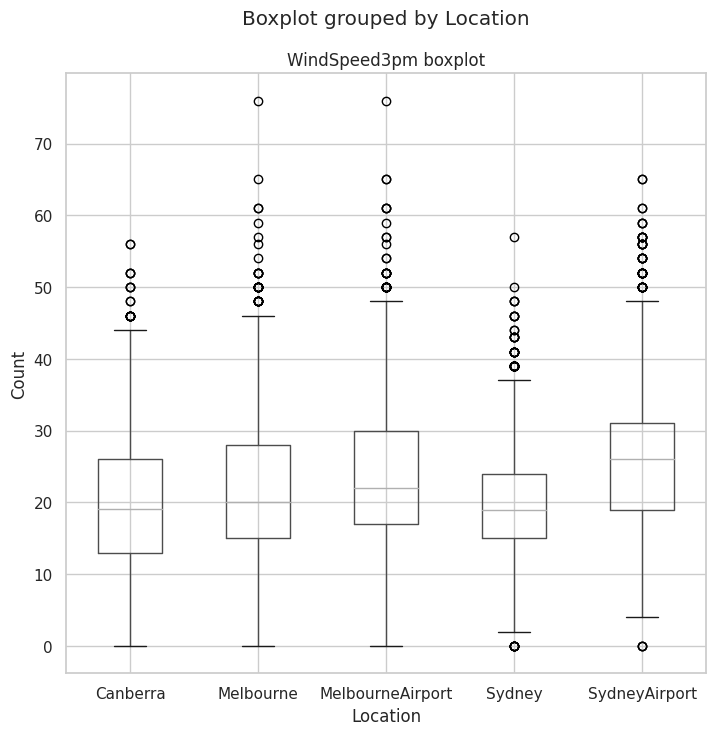

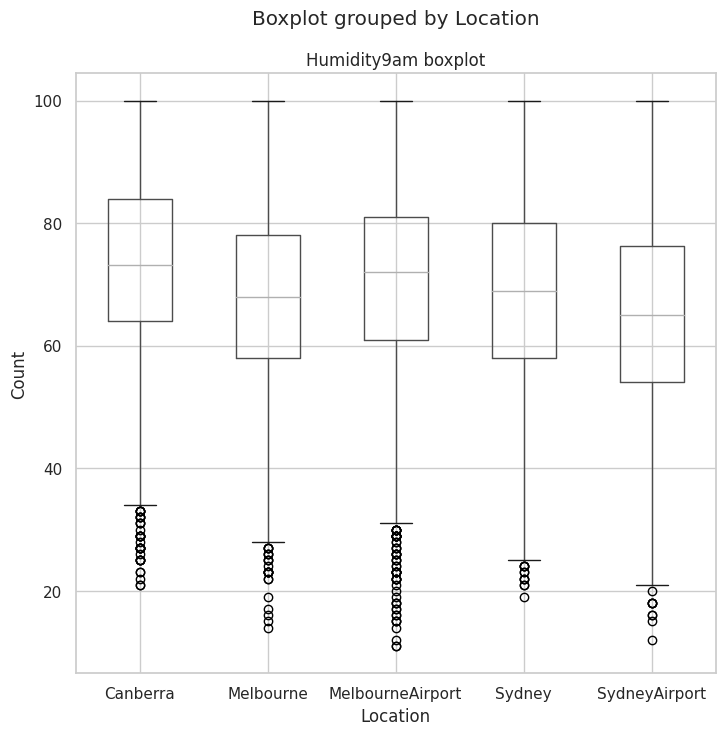

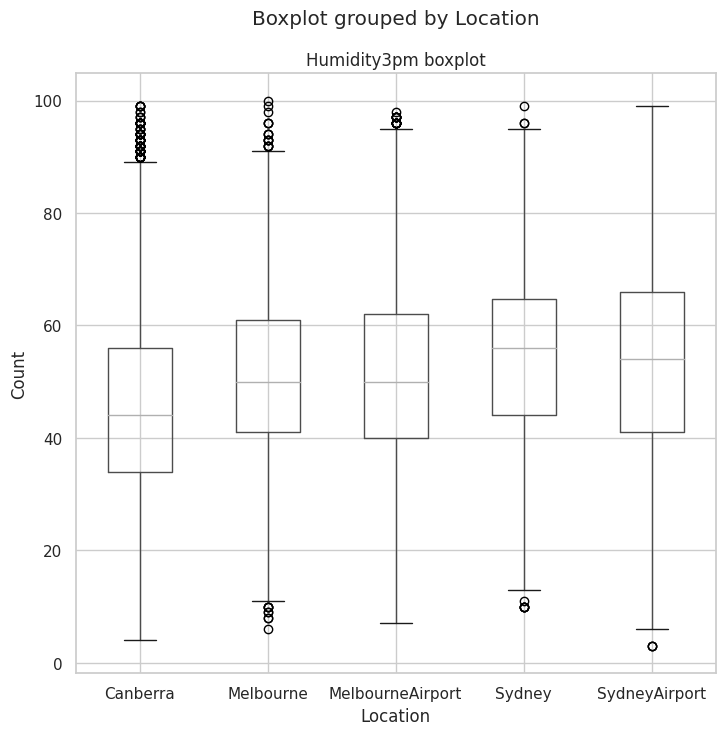

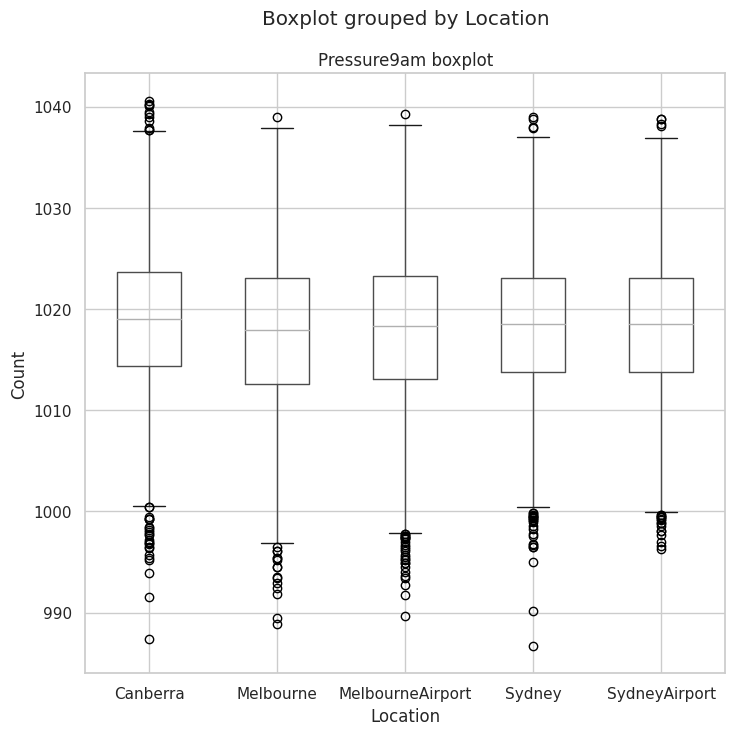

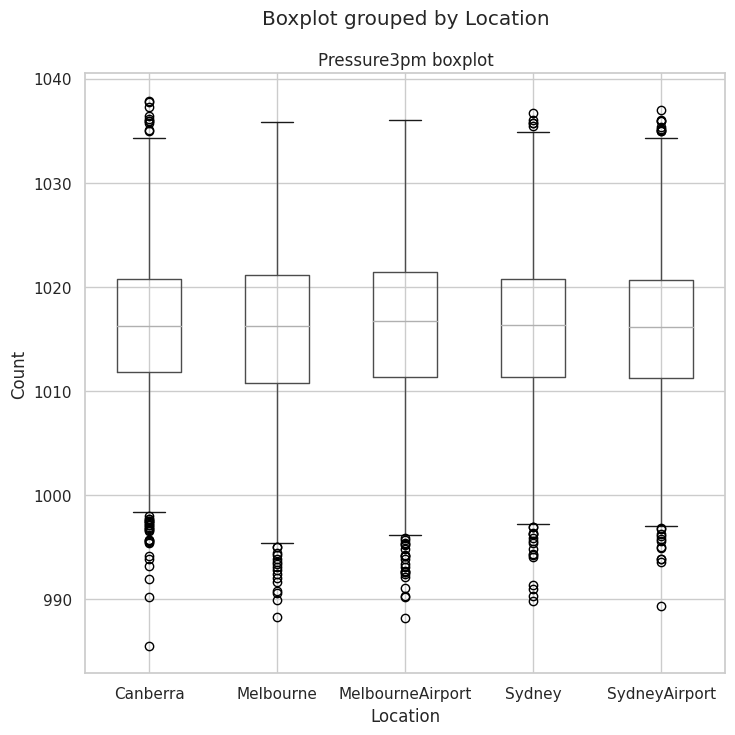

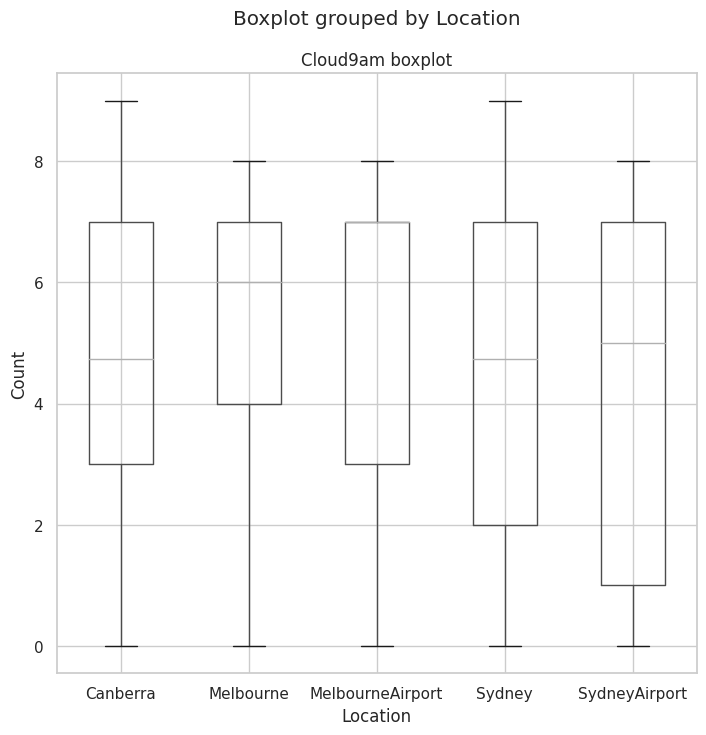

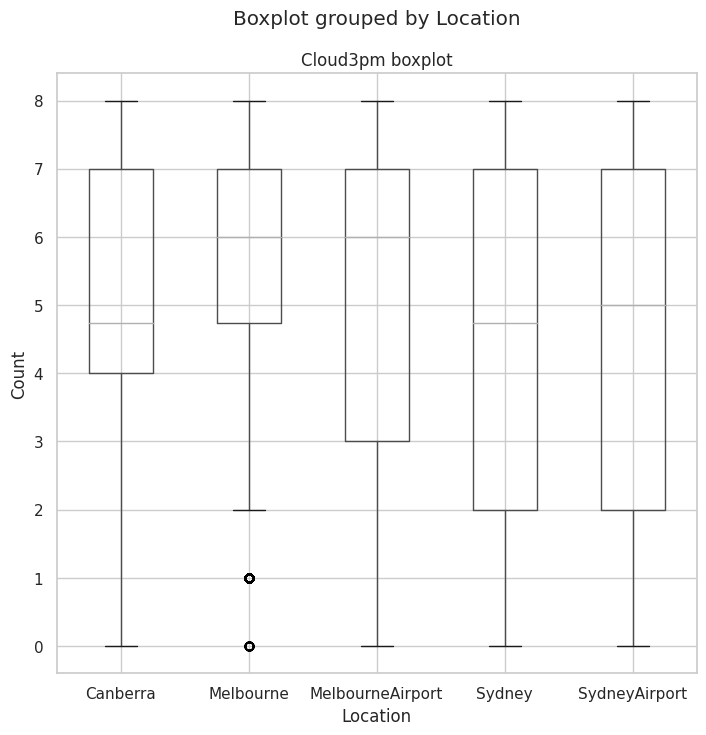

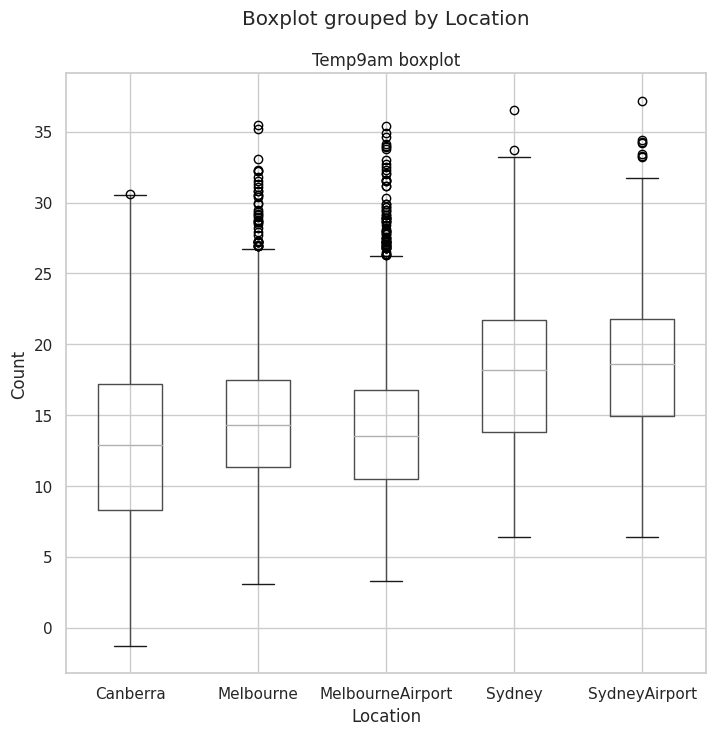

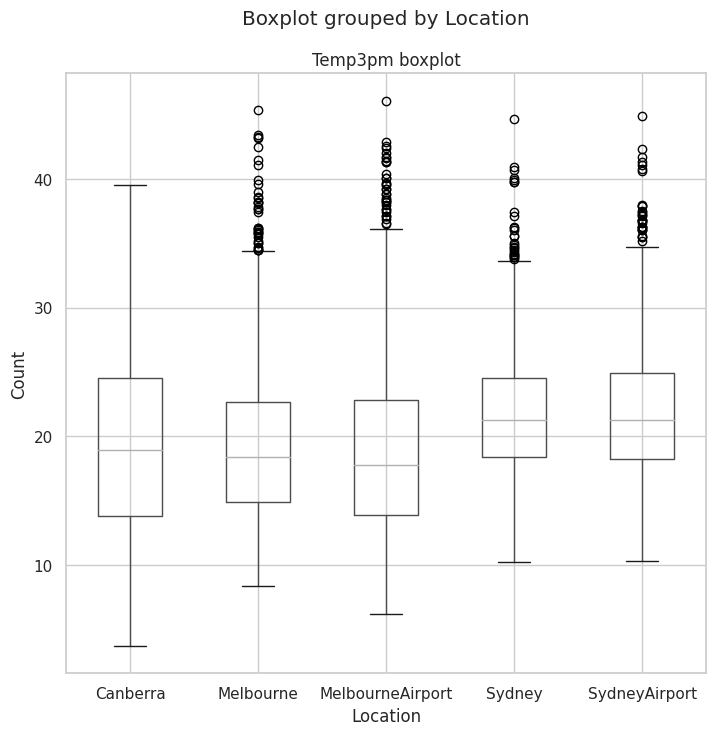

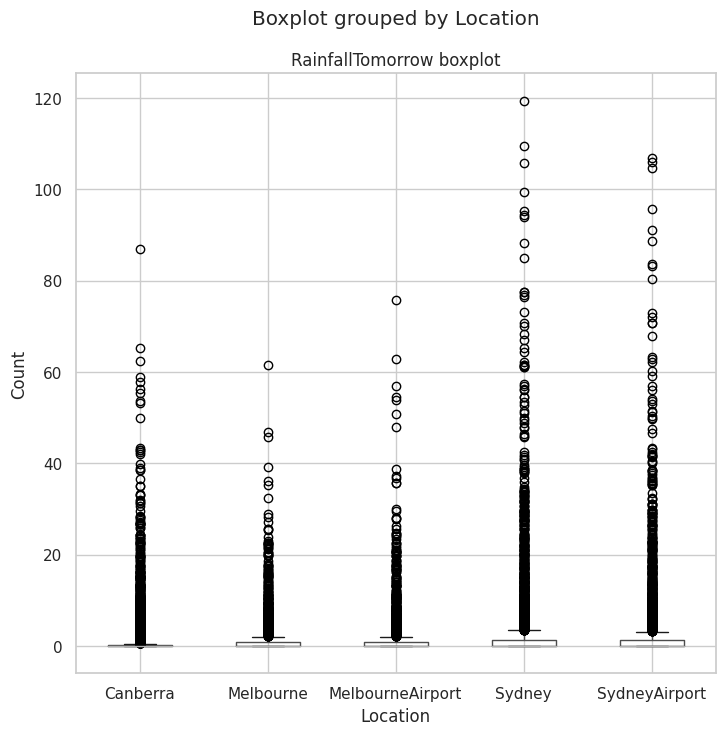

In [ ]:
# Visualizar boxplots según localidad
plt.figure(figsize=(8,8))
x_size = 10
y_size = 5
for n_col, column in enumerate(numerical):
  fig, axes = plt.subplots(figsize=(8,8))
  data.boxplot(column=column, by='Location', ax=axes)
  plt.ylabel('Count')
  plt.title(f'{column} boxplot')
  plt.show()


Cambiamos outliers con la función anteriormente definida, y volvemos a visualizar los boxplot para ver cómo han cambiado.

In [ ]:
# Cambiar outliers
numerical_explicative = list(set(numerical) - set(['Rainfall', 'RainfallTomorrow']))

for column in numerical_explicative:
  data_no_outliers[column] = data.groupby('Location')[column].transform(reemplazar_outliers)

<Figure size 800x800 with 0 Axes>

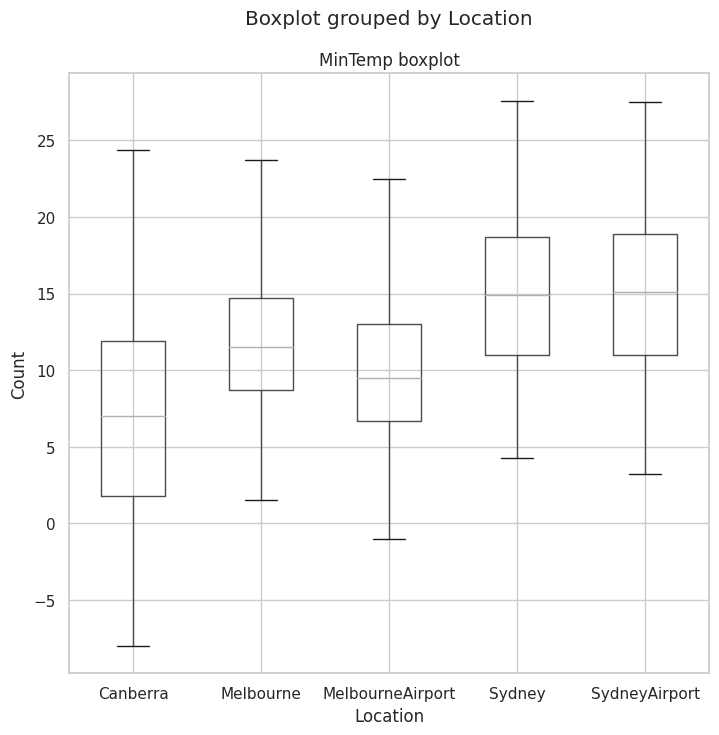

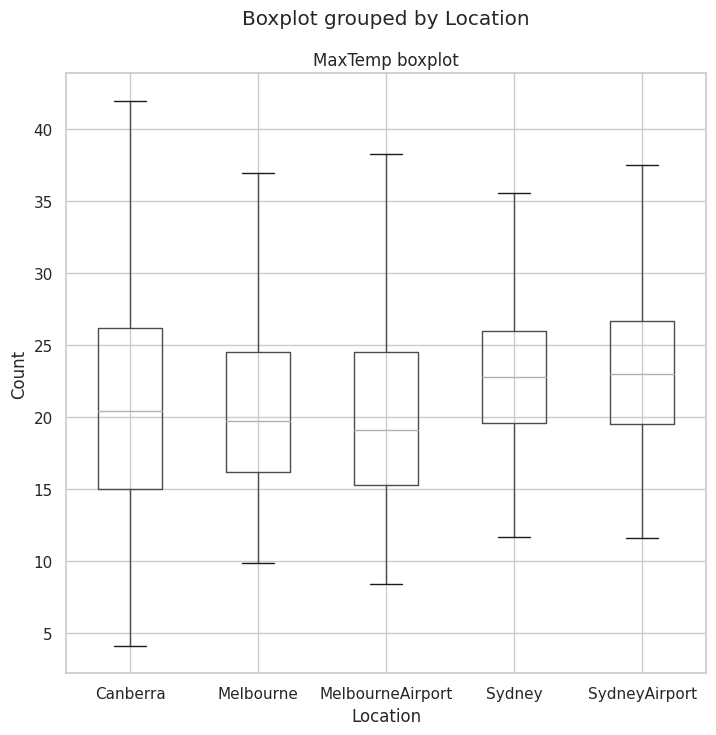

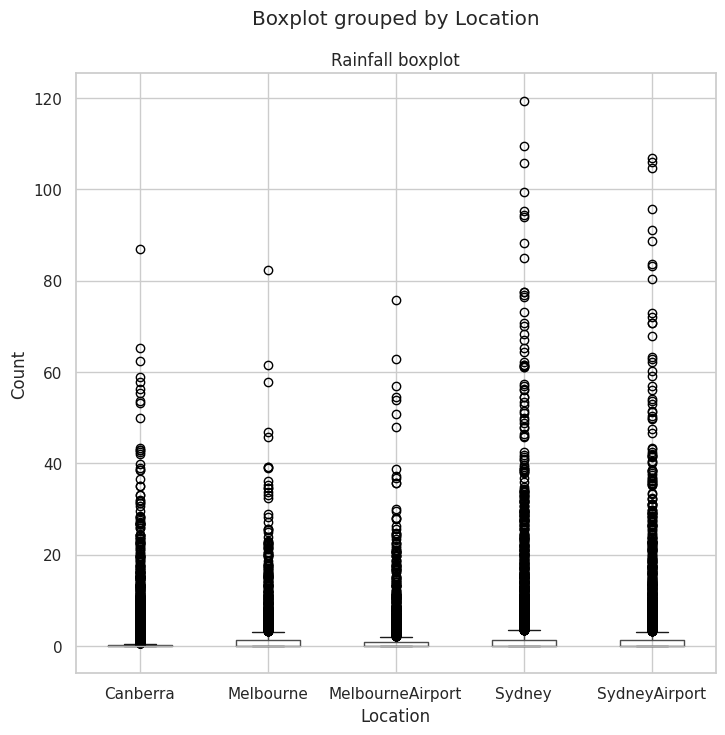

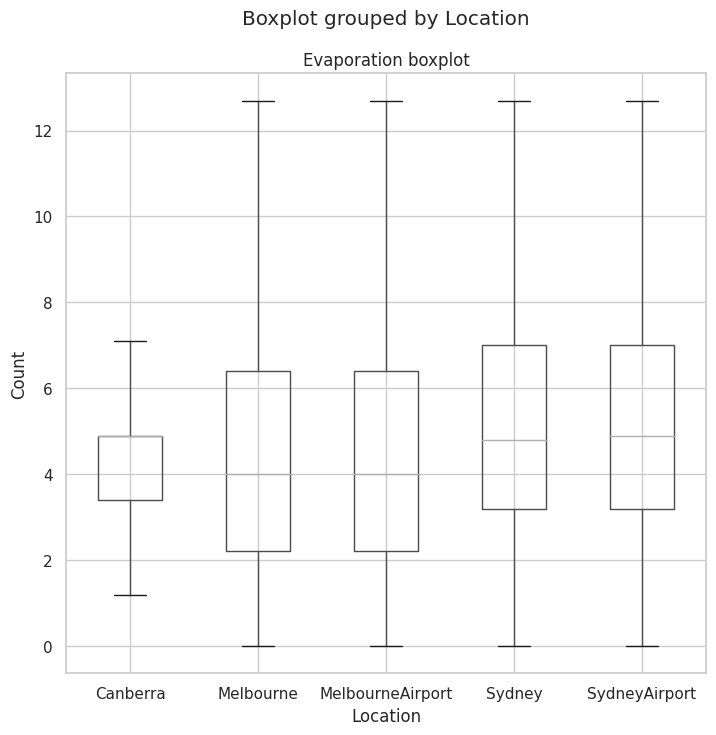

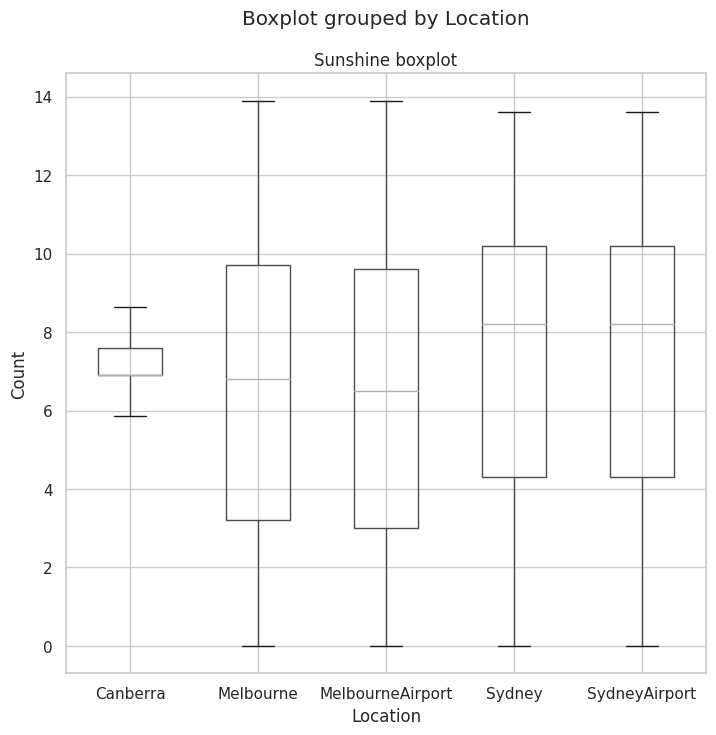

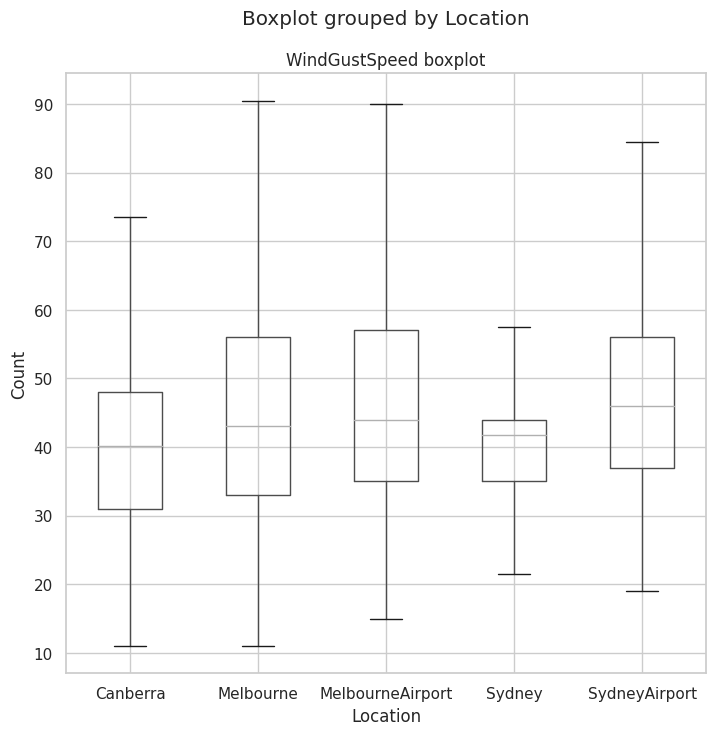

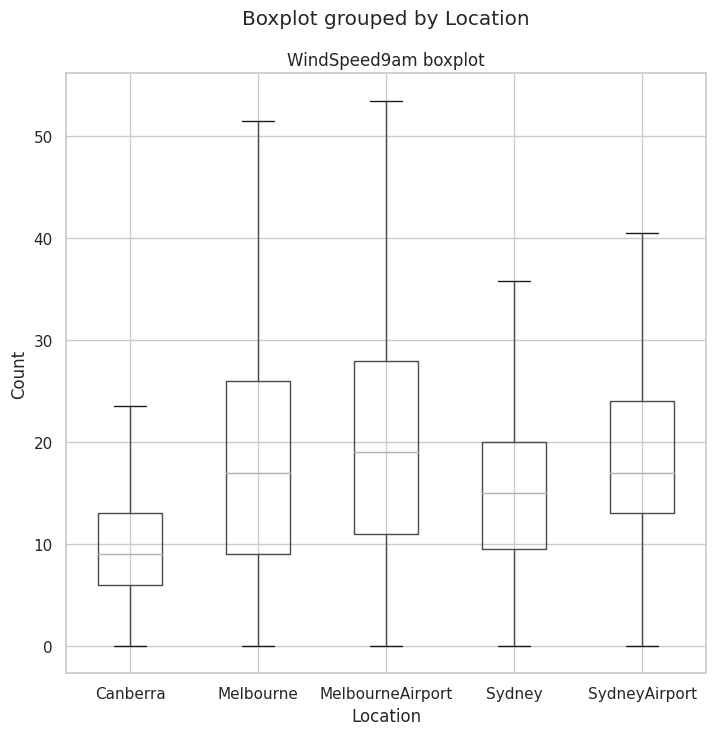

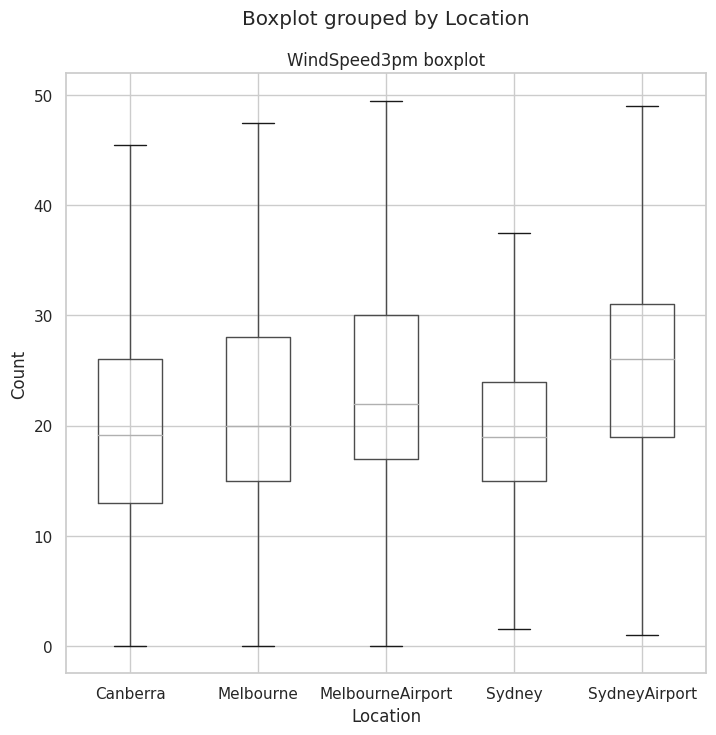

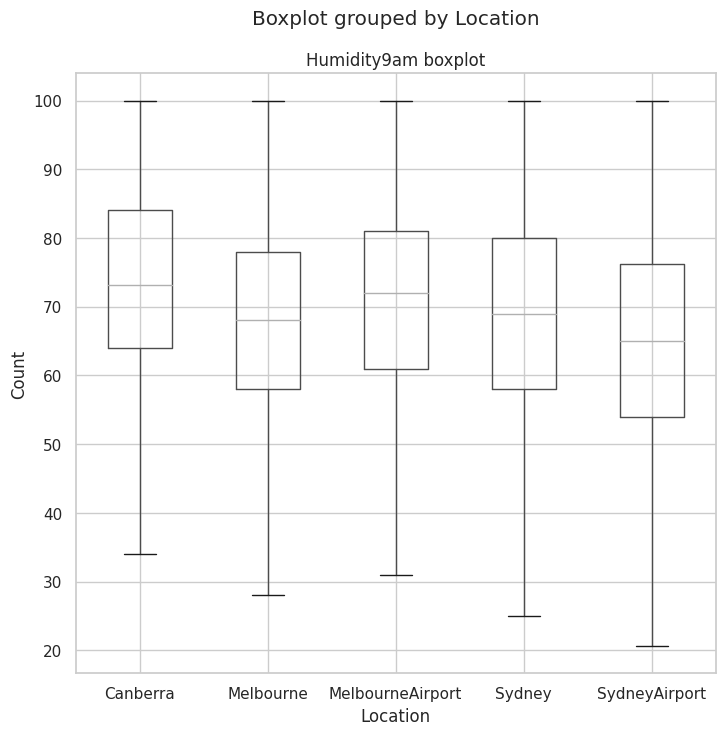

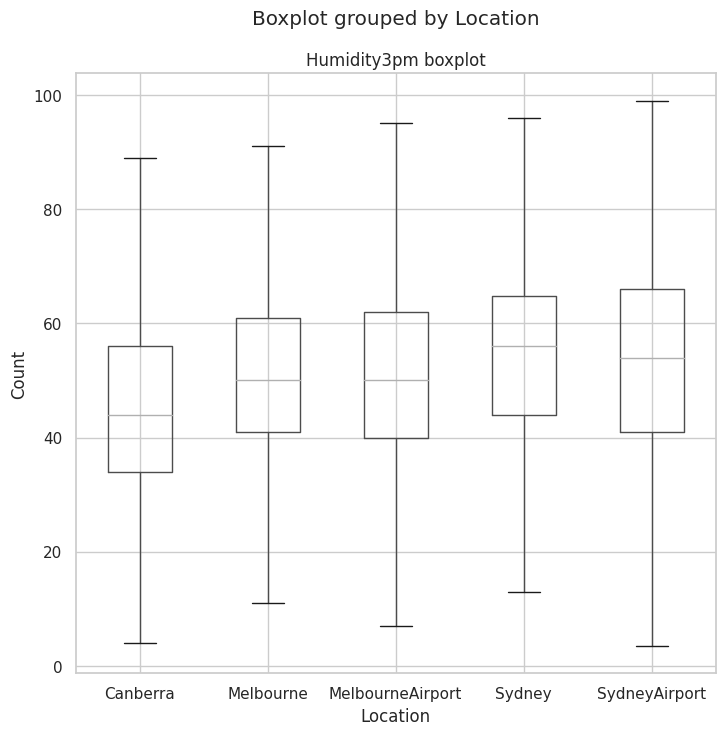

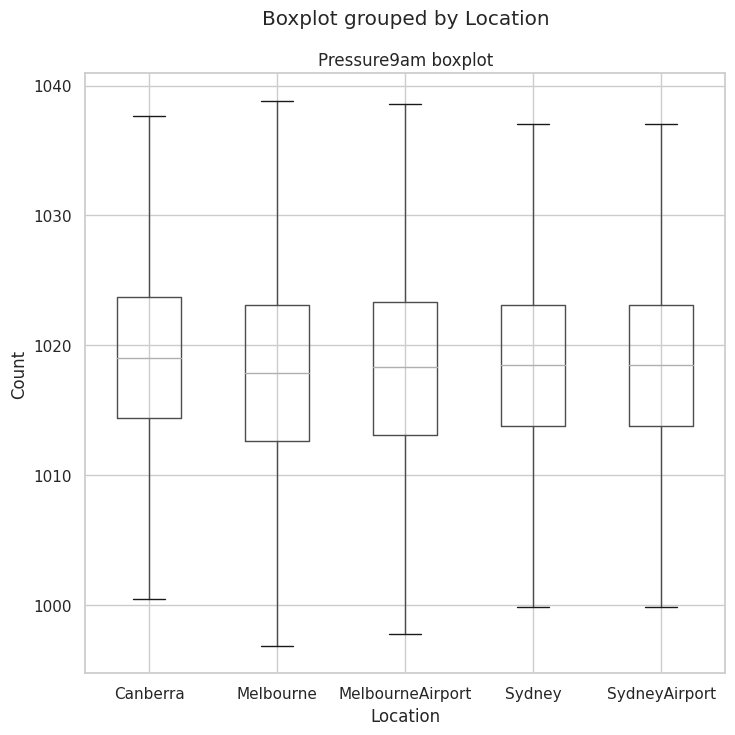

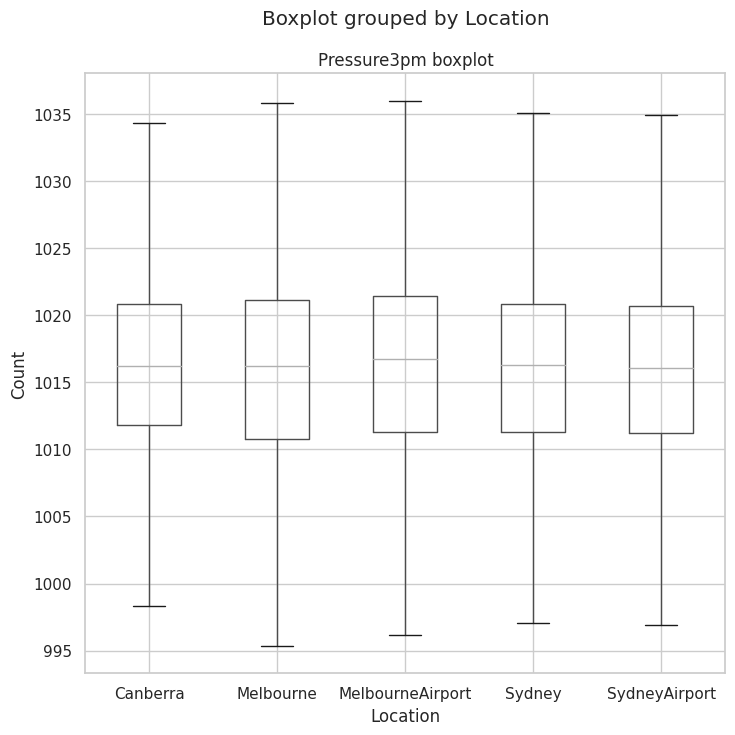

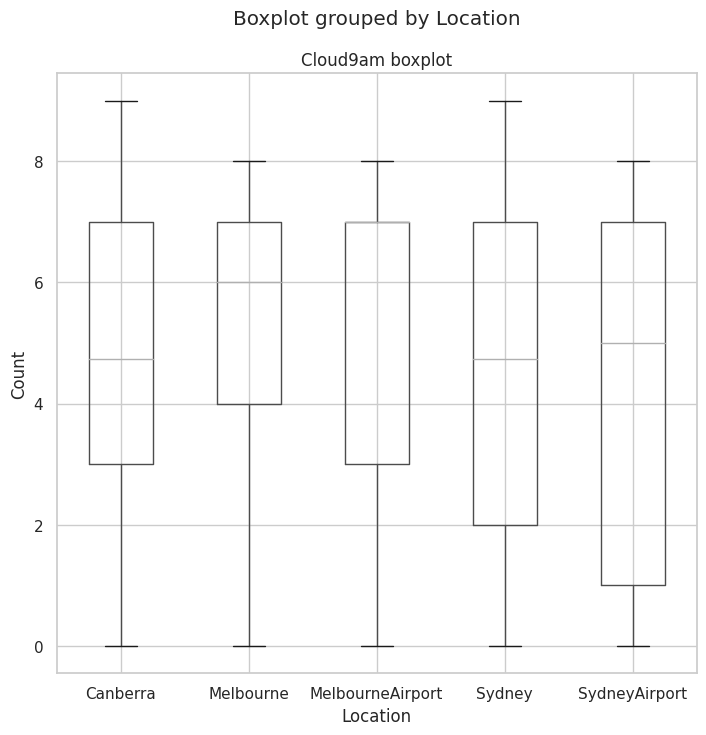

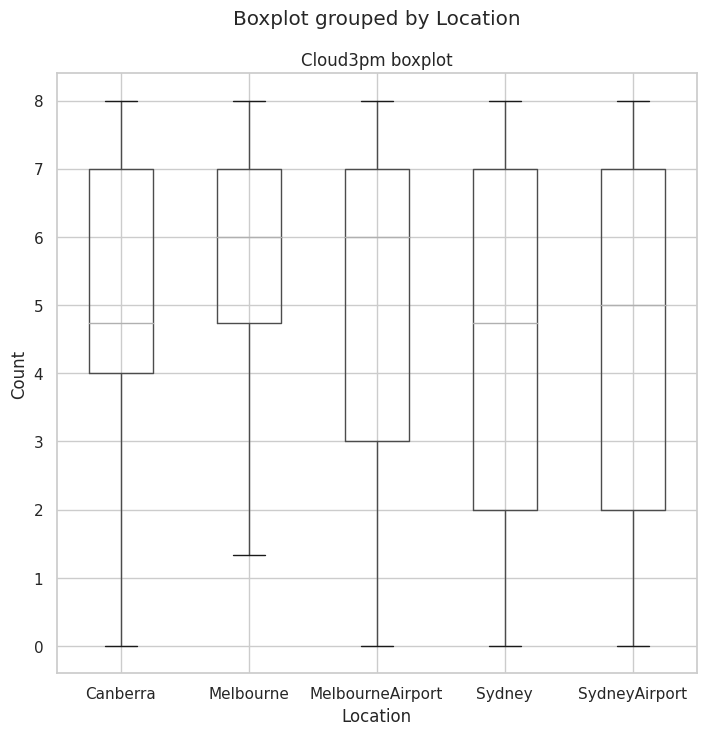

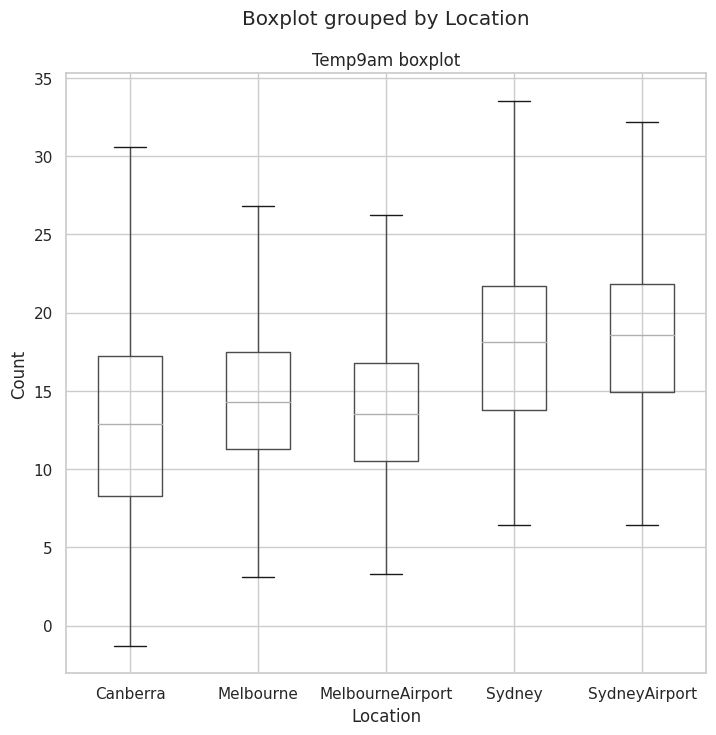

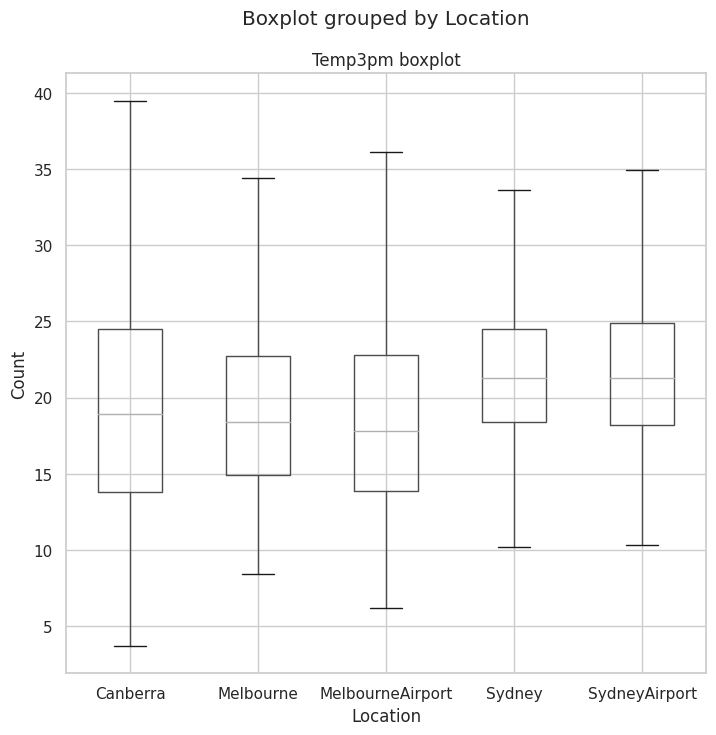

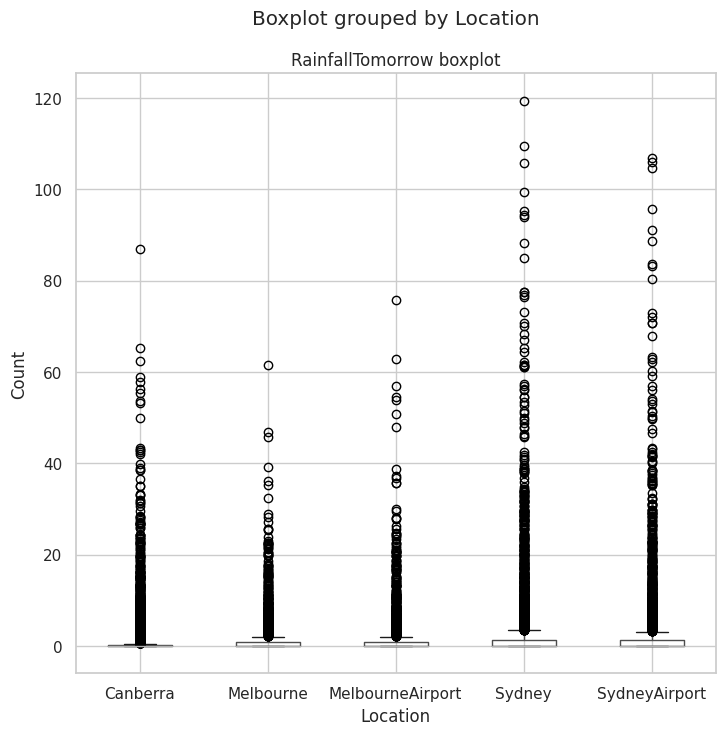

In [ ]:
# Visualizar boxplots
plt.figure(figsize=(8,8))
x_size = 10
y_size = 5
for n_col, column in enumerate(numerical):
  fig, axes = plt.subplots(figsize=(8,8))
  data_no_outliers.boxplot(column=column, by='Location', ax=axes)
  plt.ylabel('Count')
  plt.title(f'{column} boxplot')
  plt.show()

Luego, agregaremos más columnas: aquellas que representen una diferencia, como por ejemplo: TempDiff (diferencia entre la temperatura máxima y la mínima), PressureDiff (diferencia entre la presión a las 9am y a las 3pm), etc.

Nuevamente, este criterio lo tomamos con el fin de realizar comparaciones en las regresiones.

In [ ]:
# Crear columnas que aprecien la diferencia
data['TempDiff'] = data['MaxTemp'] - data['MinTemp']
data['PressureDiff'] = data['Pressure3pm'] - data['Pressure9am']
data['CloudDiff'] = data['Cloud3pm'] - data['Cloud9am']
data['WindSpeedDiff'] = data['WindSpeed3pm'] - data['WindSpeed9am']

data_no_outliers['TempDiff'] = data_no_outliers['MaxTemp'] - data_no_outliers['MinTemp']
data_no_outliers['PressureDiff'] = data_no_outliers['Pressure3pm'] - data_no_outliers['Pressure9am']
data_no_outliers['CloudDiff'] = data_no_outliers['Cloud3pm'] - data_no_outliers['Cloud9am']
data_no_outliers['WindSpeedDiff'] = data_no_outliers['WindSpeed3pm'] - data_no_outliers['WindSpeed9am']

Por último, agregamos las columnas correspondientes a la representación polar de las direcciones.

In [ ]:
for column in ['WindDir9am', 'WindDir3pm', 'WindGustDir','Date']:
  series_cos, series_sin = dir_to_circle(data['WindDir9am'])
  data[f'{column}_cos'] = series_cos
  data[f'{column}_sin'] = series_sin
  data_no_outliers[f'{column}_cos'] = series_cos
  data_no_outliers[f'{column}_sin'] = series_sin


# Estandarización
Para poder aplicar los modelos de regresión, debemos primero estandarizar las variables explicativas para que todas tengan el mismo desvío y una no pese mas que otra.

## Tipo de estandarización

La mayoría de las variables tienen distribución normal, es lógico aplicar z-score a estas.

Las variables que no tienen una distribución normal son las que explican las nubes, que son bimodales. Con el fin de mantener el desvío similar entre las variables, decidimos usar z-score en estas.

Sin embargo, hay algunas que tienen distribuciones distintas, aquellas que corresponden a las variables a explicar. Estas tienen distribuciones inversamente proporcional. Podemos decidir no estandarizarlas, aunque podríamos considerar hacerlo por motivos de recursos computacionales.

In [ ]:
# Inicializamos la instancia
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_explicative])
scaled_data_no_outliers = scaler.fit_transform(data_no_outliers[numerical_explicative])

numerical_explicative + ['TempDiff', 'PressureDiff', 'CloudDiff', 'WindSpeedDiff',
       'WindDir9am_cos', 'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin',
       'WindGustDir_cos', 'WindGustDir_sin', 'Date_cos', 'Date_sin']

data[numerical_explicative] = scaled_data
data_no_outliers[numerical_explicative] = scaled_data_no_outliers

# Modelos
Ahora aplicaremos los modelos que aprendimos en la teoría.

## Regresión lineal
Comenzaremos con el más simple. Probamos tomando diferentes combinaciones de las variables que hemos definido, con el fin de quedarnos con aquel que mayor R^2 presente, es decir, que más explique la predicción de la variable 'RainfallTomorrow'.

Probaremos los modelos con los dos datasets definidos anteriormente: 'data' (sin tratar outliers) y 'df_no_outliers' (tratando outliers).


In [ ]:
data.drop(columns= ["Unnamed: 0", "Date"], inplace=True)

A continuación, codificaremos con get_dummies las variables categóricas: "Month", "WindGustDir", "RainToday", WindDir9am", "WindDir3pm" y "RainTomorrow" (que luego la quitaremos porque será nuestra variable a predecir)

In [75]:
df_regresion = pd.get_dummies(data)
df_regresion.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow', 'TempDiff', 'PressureDiff',
       'CloudDiff', 'WindSpeedDiff', 'WindDir9am_cos', 'WindDir9am_sin',
       'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos',
       'WindGustDir_sin', 'Date_cos', 'Date_sin', 'Location_Canberra',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N

Ahora, dentro del dataset contamos con distintas formas de representar algunas variables, como por ejemplo para la variable mes, tenemos doce variables dummy y dos variables que representan sus coordenadas polares.

Lo mismo sucede con "WindGustDir", "WindDir9am" y "WindDir3pm". Dichas variables están representadas de dos maneras en el dataset: con sus respectivas dummies y con sus respectivas coordenadas polares

### Modelo 1  (con outliers incluidos)

In [76]:
X1 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes'])  # Variables predictoras
y1 = df_regresion['RainfallTomorrow'] # Variable a predecir

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1.values.reshape(-1,1),test_size=0.2,random_state = 42)

model1 =  LinearRegression()

model1.fit(X_train1, y_train1)  # Entrenamos

y1_pred = model1.predict(X_test1) # Predecimos

R2_1 = metrics.r2_score(y_test1, y1_pred)
print("R^2: ", round(R2_1,4))

R^2:  0.2318


Observamos que si incluimos absolutamente todas las variables, el R^2 nos da aproximadamente 0,232.

Sin embargo, este modelo posee variables predictoras redundantes, por lo explicado anteriormente. A continuación, probaremos eliminando las variables dummy de las que respectan a información sobre los vientos y los meses, quedándonos solo con sus coordenadas polares. ¿Mejorará nuestro R^2?

###Modelo 2 (con outliers incluidos)

In [78]:
X2 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW',  'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'])  # Variables predictoras

y2 = df_regresion['RainfallTomorrow'] # Variable a predecir

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2.values.reshape(-1,1),test_size=0.2,random_state = 42)

model2 =  LinearRegression()

model2.fit(X_train2, y_train2)  # Entrenamos

y2_pred = model2.predict(X_test2) # Predecimos

R2_2 = metrics.r2_score(y_test2, y2_pred)
print("R^2: ", round(R2_2,4))

R^2:  0.2321


In [80]:
#guardamos los resultados para despues aplicar regresion

Xtrain_mod2 = X_train2
Xtest_mod2 = X_test2
ytrain_mod2 = y_train2
ytest_mod2 = y_test2
ypred_mod2 = y2_pred

El resultado del modelo habiendo quitado las dummies mencionadas, fue un R^2 de 0.232. Se observa un leve incremento respecto al modelo entrenado anteriormente. Esto nos indica que haber tranformado las variables del viento ("WindGustDir", "WindDir9am" y "WindDir3pm") y la variable de la fecha en sus respectivas coordenadas polares fue una buena manera de representarlas.

###Modelo 3 (con outliers incluidos)

Veremos a continuación si las variables con las que contamos información acerca de las 9am y 3pm son importantes para predecir la cantidad de lluvia mañana. Para ello, eliminaremos también 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'.

In [81]:
X3 = df_regresion.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW',  'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'])  # Variables predictoras

y3 = df_regresion['RainfallTomorrow'] # Variable a predecir


X_train3, X_test3, y_train3, y_test3 = train_test_split(X3,y3.values.reshape(-1,1),test_size=0.2,random_state = 42)

model3 =  LinearRegression()

model3.fit(X_train3, y_train3)  # Entrenamos

y3_pred = model3.predict(X_test3) # Predecimos

R2_3 = metrics.r2_score(y_test3, y3_pred)
print("R^2: ", round(R2_3,4))

R^2:  0.1805


En este caso, el resultado de R^2 es de 0,18. Esto nos indica que con sólo tener las diferencias entre las 9am y las 3pm no es suficiente.

Concluimos que para el dataset sin tratar outliers, la mejor predicción de RainfallTomorrow se da cuando las variables predictoras son: 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'TempDiff', 'PressureDiff', 'CloudDiff', 'WindSpeedDiff', 'WindDir9am_cos', 'WindDir9am_sin', 'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos', 'WindGustDir_sin', 'Date_cos', 'Date_sin', 'Location_Canberra', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney', 'Location_SydneyAirport', 'RainToday_No', 'RainToday_Yes'

### Modelo 4 (sin outliers incluidos)

En los próximos dos modelos, utilizaremos el dataset en el cual tratamos los outliers: 'data_no_outliers'. Aquí, el objetivo será ver si los resultados son mejores que en los modelos anteriores, donde no tratamos los outliers.


In [ ]:
data_no_outliers.drop(columns= ["Unnamed: 0", "Date"], inplace=True)

In [ ]:
dummies_no_out = pd.get_dummies(data_no_outliers)
dummies_no_out.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainfallTomorrow', 'TempDiff', 'PressureDiff',
       'CloudDiff', 'WindSpeedDiff', 'WindDir9am_cos', 'WindDir9am_sin',
       'WindDir3pm_cos', 'WindDir3pm_sin', 'WindGustDir_cos',
       'WindGustDir_sin', 'Date_cos', 'Date_sin', 'Location_Canberra',
       'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Sydney',
       'Location_SydneyAirport', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N

Haremos lo mismo que en el primer modelo: tomar todas las variables, aunque algunas sean redundantes.

In [ ]:
X4 = dummies_no_out.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes'])  # Variables predictoras
y4 = dummies_no_out['RainfallTomorrow'] # Variable a predecir

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4,y4.values.reshape(-1,1),test_size=0.2,random_state = 42)

model4 =  LinearRegression()

model4.fit(X_train4, y_train4)  # Entrenamos

y4_pred = model4.predict(X_test4) # Predecimos

R2_4 = metrics.r2_score(y_test4, y4_pred)
print("R^2: ", round(R2_4,4))

R^2:  0.223


### Modelo 5 (sin outliers incluidos)

In [ ]:
X5 = dummies_no_out.drop(columns=['RainfallTomorrow', 'RainTomorrow_No', 'RainTomorrow_Yes', 'WindGustDir_E', 'WindGustDir_ENE',
       'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE', 'WindGustDir_NNE',
       'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S', 'WindGustDir_SE',
       'WindGustDir_SSE', 'WindGustDir_SSW', 'WindGustDir_SW', 'WindGustDir_W',
       'WindGustDir_WNW', 'WindGustDir_WSW', 'WindDir9am_E', 'WindDir9am_ENE',
       'WindDir9am_ESE', 'WindDir9am_N', 'WindDir9am_NE', 'WindDir9am_NNE',
       'WindDir9am_NNW', 'WindDir9am_NW', 'WindDir9am_S', 'WindDir9am_SE',
       'WindDir9am_SSE', 'WindDir9am_SSW', 'WindDir9am_SW', 'WindDir9am_W',
       'WindDir9am_WNW', 'WindDir9am_WSW', 'WindDir3pm_E', 'WindDir3pm_ENE',
       'WindDir3pm_ESE', 'WindDir3pm_N', 'WindDir3pm_NE', 'WindDir3pm_NNE',
       'WindDir3pm_NNW', 'WindDir3pm_NW', 'WindDir3pm_S', 'WindDir3pm_SE',
       'WindDir3pm_SSE', 'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W',
       'WindDir3pm_WNW', 'WindDir3pm_WSW',  'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep'])  # Variables predictoras

y5 = dummies_no_out['RainfallTomorrow'] # Variable a predecir

X_train5, X_test5, y_train5, y_test5 = train_test_split(X5,y5.values.reshape(-1,1),test_size=0.2,random_state = 42)

model5 =  LinearRegression()

model5.fit(X_train5, y_train5)  # Entrenamos

y5_pred = model5.predict(X_test5) # Predecimos

R2_5 = metrics.r2_score(y_test5, y5_pred)
print("R^2: ", round(R2_5,4))

R^2:  0.2234


Ambos modelos sin outliers en el dataset nos han arrojado valores de R^2 menores. Esto puede indicarnos que el modelo puede explicar mejor las predicciones sin que tratemos los valores atípicos.

### Analizando las métricas del modelo 2

Como el modelo 2 fue el que mejor R^2 nos otorgó, haremos un breve análisis del mismo.

En el siguiente gráfico se observan los valores que tomaron los coeficientes de las variables predictoras en el modelo 2.

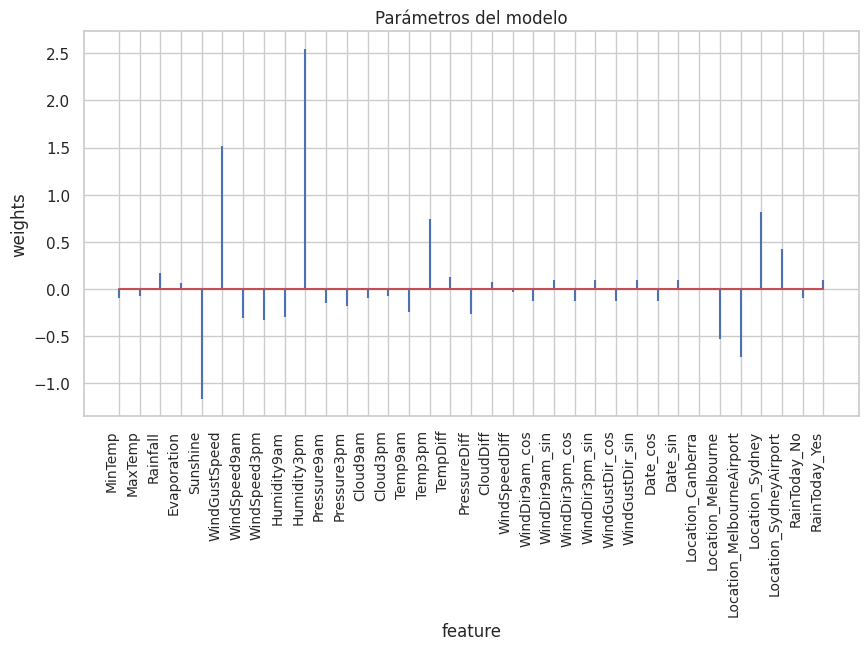

In [ ]:
df_coeficientes = pd.DataFrame({'predictor': X_train2.columns, 'coef': model2.coef_.flatten()})

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('feature')
ax.set_ylabel('weights')
ax.set_title('Parámetros del modelo')
plt.show()

In [ ]:
rmse_ols = mean_squared_error(y_test2, y2_pred, squared = False)

print(f"El error (rmse) de test es: {rmse_ols}")

El error (rmse) de test es: 7.255832772366685


In [ ]:
R2 = metrics.r2_score(y_test2, y2_pred)
R2

0.23206235885307225

Observamos el gráfico de residuos del modelo.

<ipython-input-55-e53a6e89feb7>:5: RuntimeWarning: divide by zero encountered in divide
  plt.scatter(y_test2,100*(y_test2-y2_pred)/y_test2)


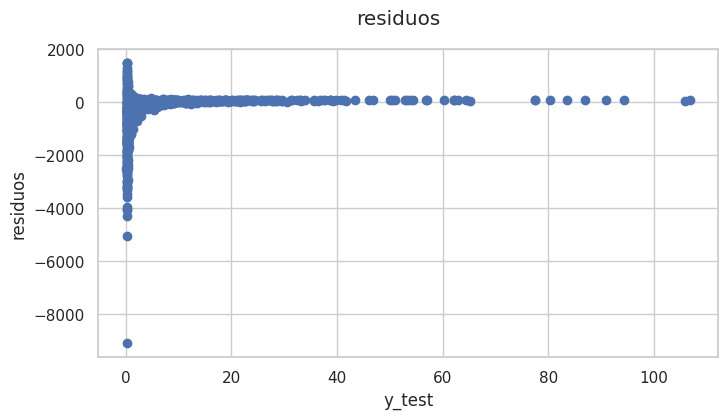

In [ ]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('residuos')
plt.xlabel('y_test')
plt.ylabel('residuos')
plt.scatter(y_test2,100*(y_test2-y2_pred)/y_test2)
plt.show()



## Gradiente Descendiente
Probemos utilizar las funciones definidas en clase

In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, num_iterations=1000):
    """
    Perform gradient descent to fit a linear regression model and plot learning and testing errors.

    Parameters:
    - X_train: Numpy array of shape (m_train, n) for training features.
    - y_train: Numpy array of shape (m_train,) for training target variable.
    - X_test: Numpy array of shape (m_test, n) for testing features.
    - y_test: Numpy array of shape (m_test,) for testing target variable.
    - learning_rate: The learning rate for gradient descent.
    - num_iterations: The number of iterations for gradient descent.

    Returns:
    - theta: Numpy array of shape (n,) representing the learned coefficients.
    """

    m_train, n = X_train.shape
    m_test, _ = X_test.shape
    theta = np.zeros(n)  # Initialize coefficients to zeros

    train_errors = []
    test_errors = []

    for epoch in range(num_iterations):
        # Calculate the predicted values for training and testing sets
        y_train_pred = X_train.dot(theta)
        y_test_pred = X_test.dot(theta)

        # Calculate the training and testing errors (Mean Squared Error)
        train_error = np.mean((y_train_pred - y_train) ** 2)
        test_error = np.mean((y_test_pred - y_test) ** 2)

        train_errors.append(train_error)
        test_errors.append(test_error)

        # Calculate the gradient for training set
        gradient = (1 / m_train) * X_train.T.dot(y_train_pred - y_train)

        # Update the coefficients using gradient descent
        theta -= learning_rate * gradient

    # Plot learning and testing errors
    plt.figure()
    plt.plot(range(num_iterations), train_errors, label='Training Error')
    plt.plot(range(num_iterations), test_errors, label='Testing Error')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

    return theta


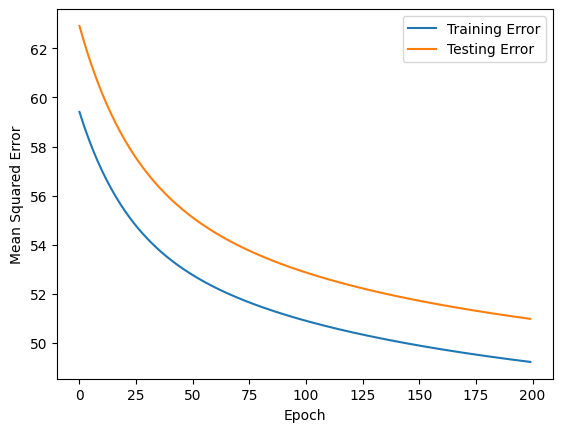

MinTemp            0.451073
MaxTemp           -0.141286
Evaporation       -0.143350
WindGustSpeed      0.476581
WindSpeed9am       0.462791
                     ...   
WindGustDir_SSW    0.257911
WindGustDir_SW     0.174187
WindGustDir_W      0.519673
WindGustDir_WNW    0.186584
WindGustDir_WSW    0.173532
Length: 64, dtype: float64

In [ ]:
gradient_descent(X_train, y_train, X_test, y_test, learning_rate=0.01, num_iterations=200)

## Ridge

Basándonos en el modelo de regresión 2, que fue el que mejores resultados nos otorgó, realizaremos regularización Ridge.

In [82]:
modelo_ridge = RidgeCV(alphas = np.logspace(-10, 10, 200),
                           fit_intercept   = True,
                           store_cv_values = True)

_ = modelo_ridge.fit(Xtrain_mod2, ytrain_mod2)

A continuación, vemos como fueron variando los parámetros del modelo.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.93625e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=4.98701e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.24979e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=7.87208e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarnin

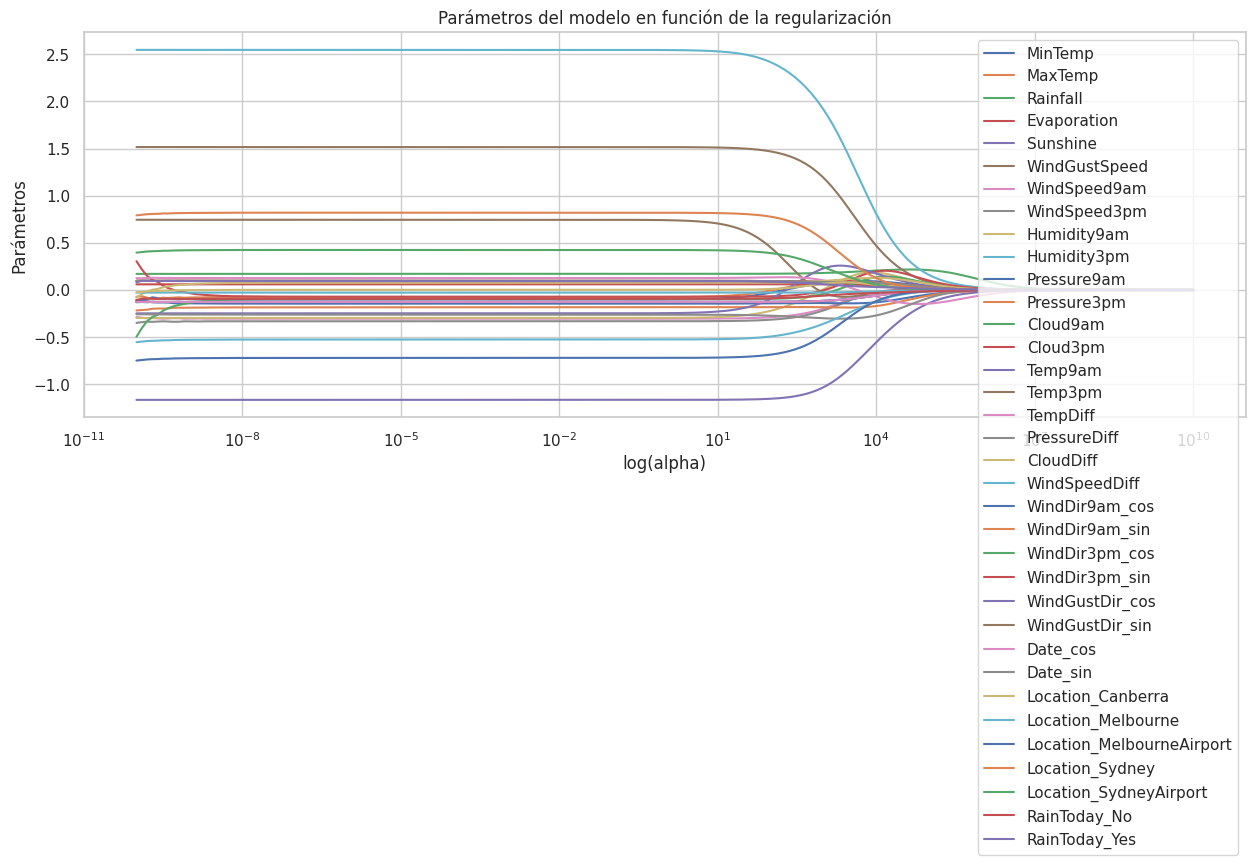

In [83]:
alphas = modelo_ridge.alphas
coefs = []

for alpha in alphas:
    modelo_aux =  Ridge(alpha=alpha)
    modelo_aux.fit(Xtrain_mod2, ytrain_mod2)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=Xtrain_mod2.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización');
plt.axis('tight')
plt.legend()
plt.show()

En el siguiente gráfico se muestra cómo fue evolucionando el error de validación en función del alpha.

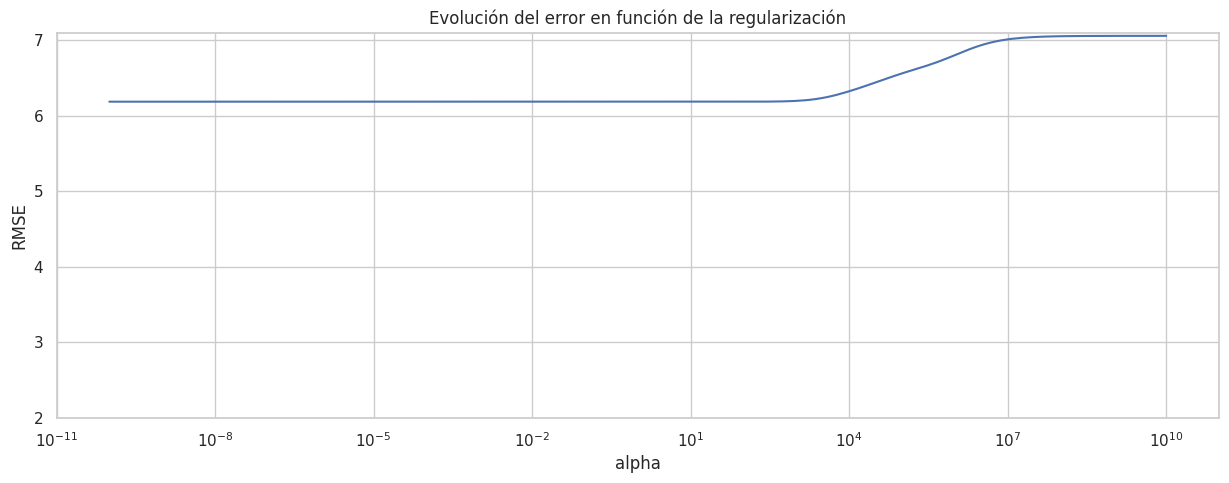

In [84]:
mod = modelo_ridge

mse_cv = mod.cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod.alphas[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod.alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

In [85]:
# Mejor valor alpha encontrado

print(f"Mejor valor de alpha encontrado: {modelo_ridge.alpha_}")

Mejor valor de alpha encontrado: 57.38441648302404


Vemos que el mejor alpha que encontró el modelo es 57,38 aproximadamente.

Finalmente, conoceremos el R^2 y el rmse luego de aplicar la regularización Ridge.

In [ ]:
Xtrain_mod2 = X_train2
Xtest_mod2 = X_test2
ytrain_mod2 = y_train2
ytest_mod2 = y_test2
ypred_mod2 = y2_pred

In [86]:
from sklearn.metrics import r2_score
y_pred = modelo_ridge.predict(Xtest_mod2)

# Calcula el R^2
R2 = r2_score(ytest_mod2, y_pred)

print("R^2:", R2)

R^2: 0.23191149039075354


In [87]:
rmse_ridge = mean_squared_error(ytest_mod2,
                y_pred,
                squared = False
             )

print(f"El error (rmse) de test es: {rmse_ridge}")

El error (rmse) de test es: 7.25654547514033


Observamos que el R^2 no ha mejorado respecto a los resultados de la regresión lineal en el modelo 2.

### Regularización Lasso

In [ ]:
Xtrain_mod2 = X_train2 Xtest_mod2 = X_test2 ytrain_mod2 = y_train2 ytest_mod2 = y_test2 ypred_mod2 = y2_pred

In [89]:
modelo_lasso = LassoCV(alphas=np.logspace(-10, 10, 200), cv=10)
_ = modelo_lasso.fit(Xtrain_mod2, ytrain_mod2.ravel())

In [91]:
alphas = modelo_lasso.alphas_
coefs = []

for alpha in alphas:
    modelo_aux = Lasso(alpha=alpha, max_iter=10000)
    modelo_aux.fit(Xtrain_mod2, ytrain_mod2)
    coefs.append(modelo_aux.coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=Xtest_mod2.columns)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.483e+02, tolerance: 5.988e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.932e+02, tolerance: 5.988e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.115e+03, tolerance: 5.988e

KeyboardInterrupt: ignored

La regularización Lasso no converge, aún seteándole iteracionex máximas 10.000

In [93]:
y_pred = modelo_lasso.predict(Xtest_mod2)

In [94]:
rmse_lasso = mean_squared_error(ytest_mod2,y_pred,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 7.256180014183028


In [95]:
R2 = metrics.r2_score(y_test2, y_pred)
R2

0.23198885483210574

Observamos que Lasso tampoco ha podido mejorar el resultado del R^2 respecto al del modelo 2 de regresión lineal. Además, no ha convergido.